In [21]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import string

warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 분석할 년도 입력

In [22]:
year=input('분석할 년도를 입력하세요 : ')

분석할 년도를 입력하세요 : 2018


# 대여이력 정보

In [23]:
import os
path ="data/년월별/"

In [24]:
month_ea=12
for i in range(1, month_ea+1):
    globals()['month_{}'.format(i)]=pd.read_csv(path+'{}_{}.csv'.format(year,i), encoding='cp949')

# 월별 이용량

## - 월별 전체 이용량

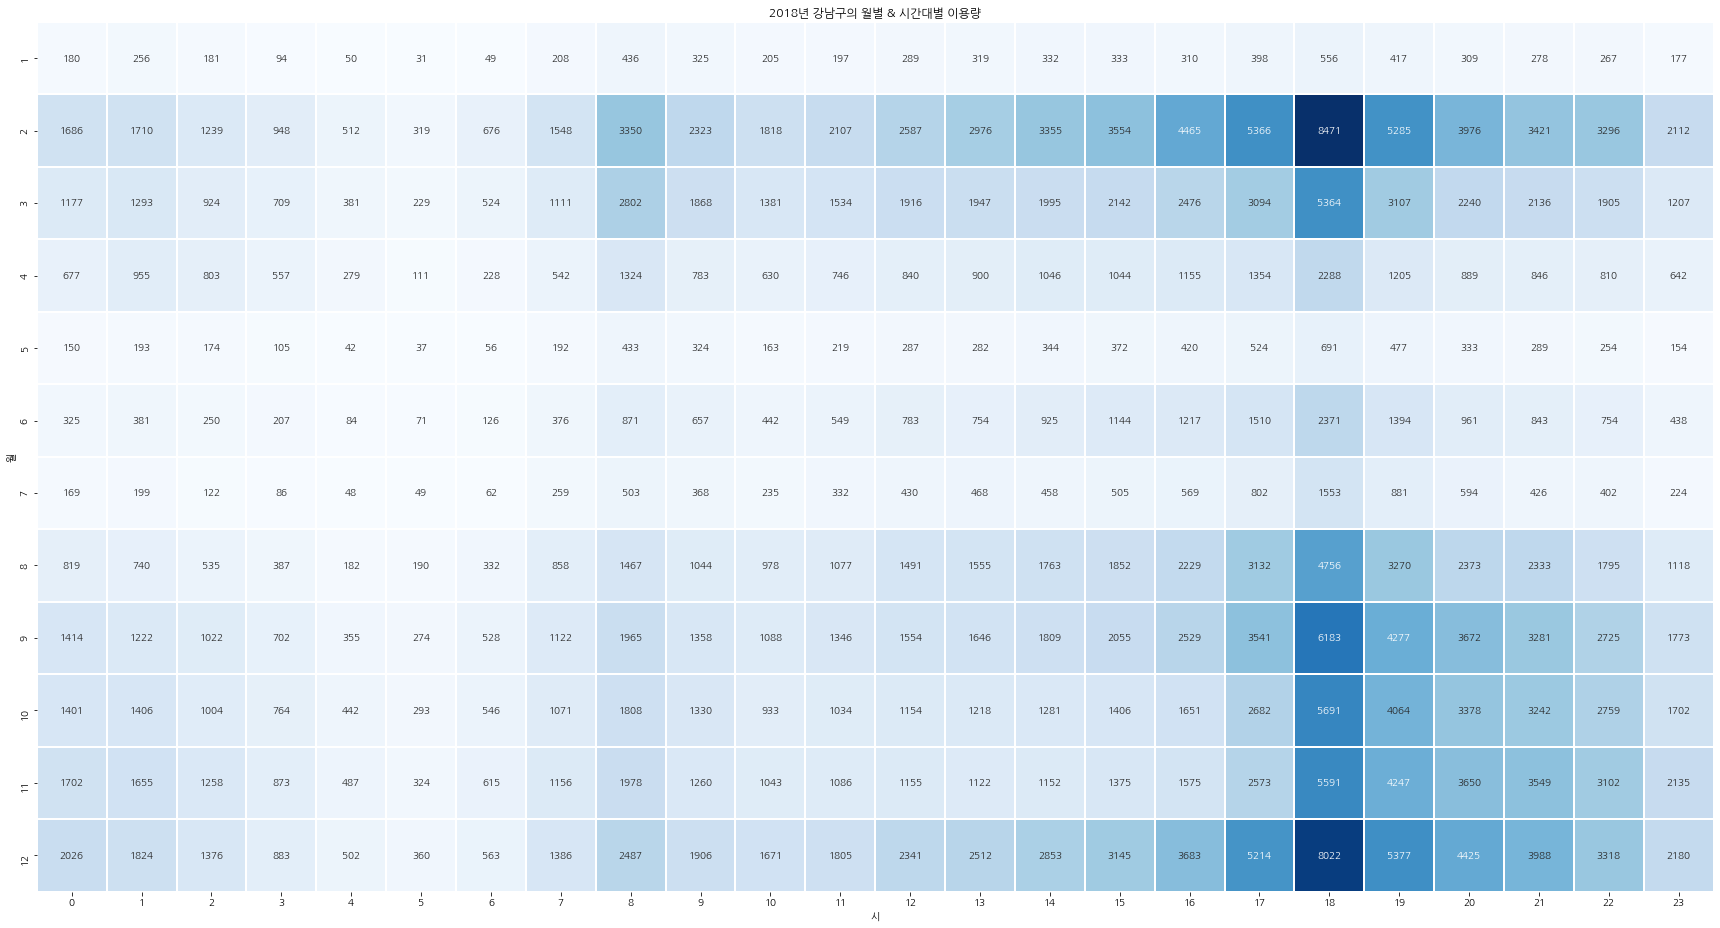

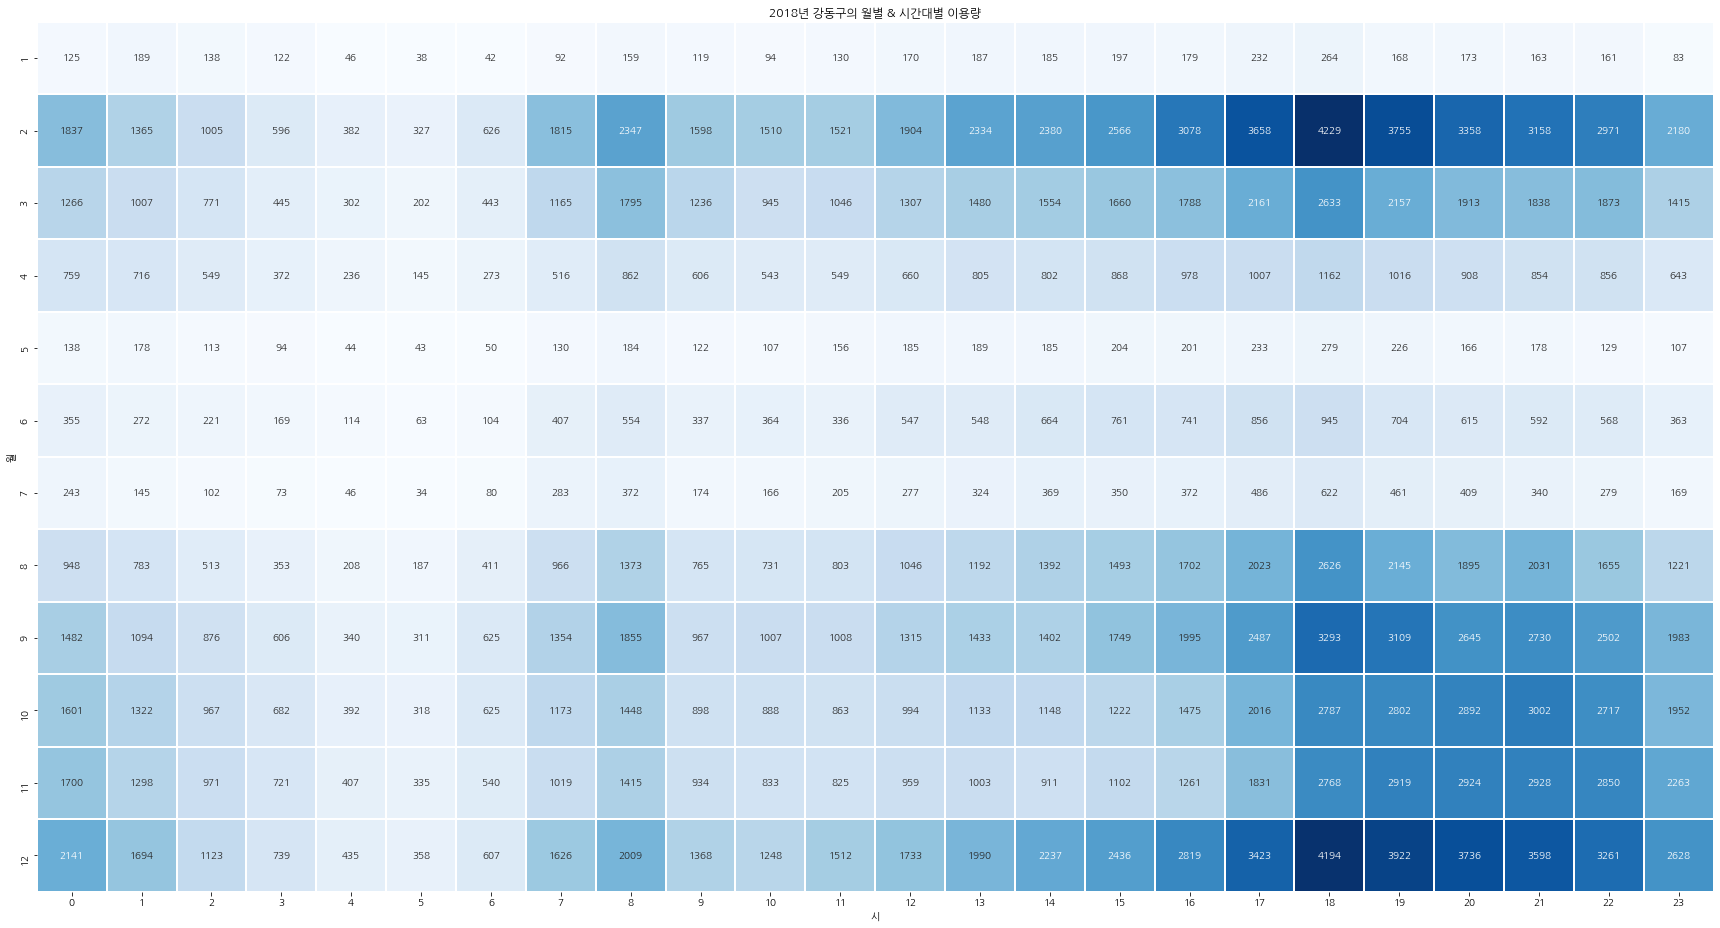

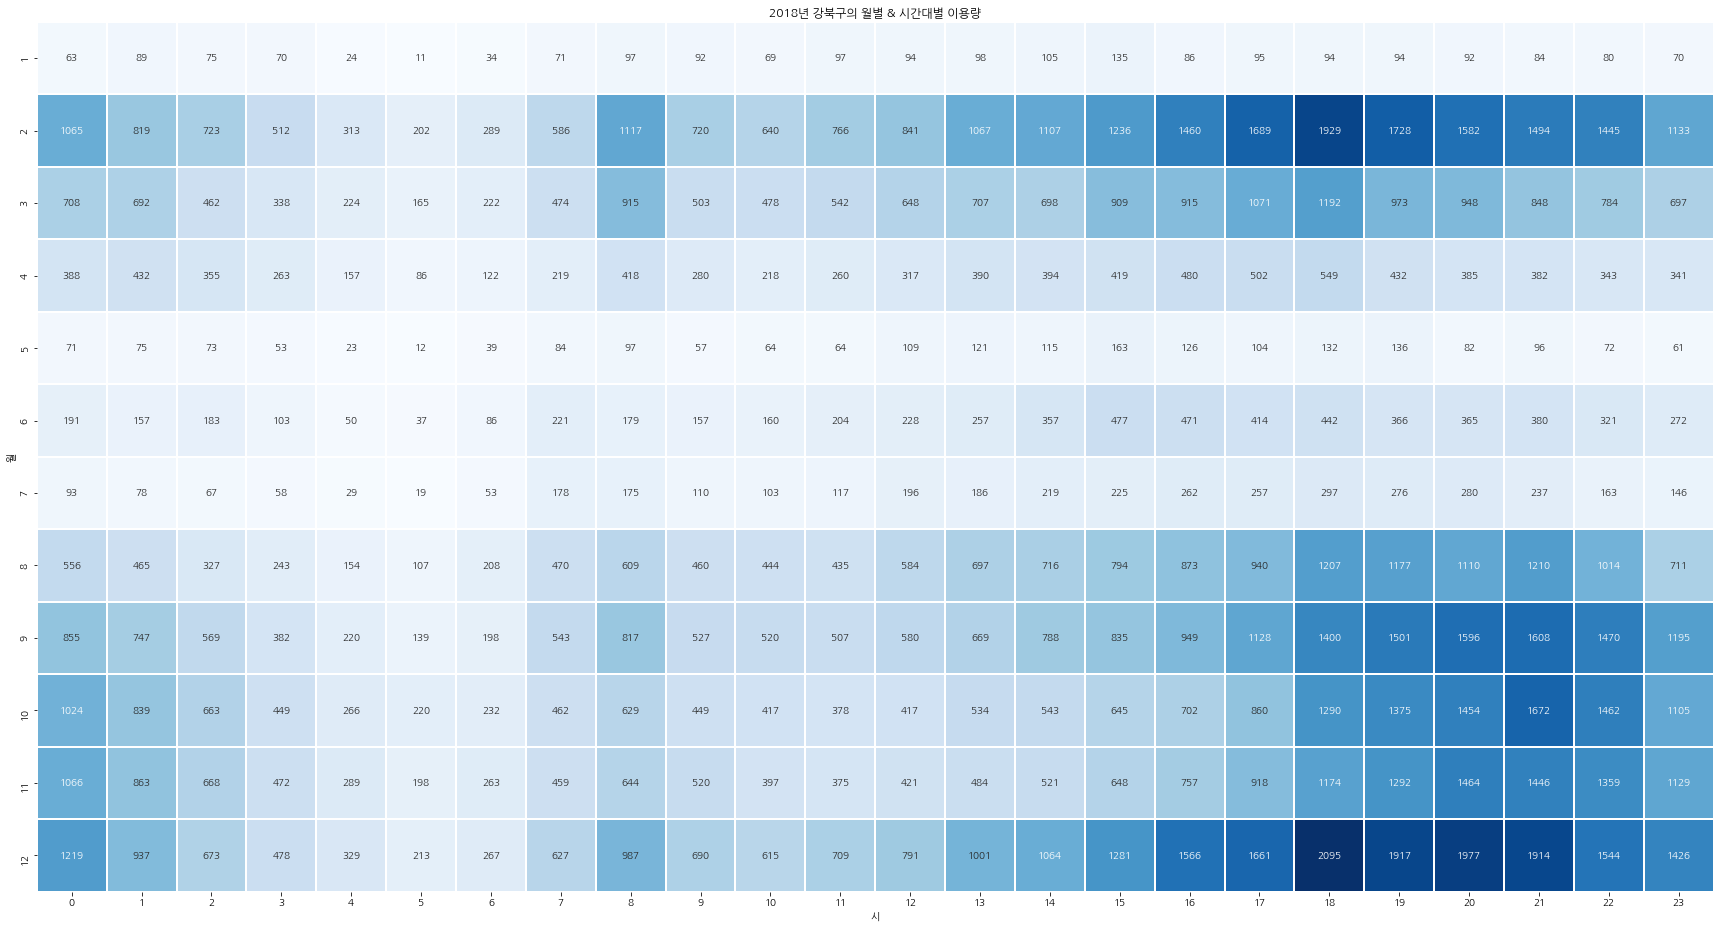

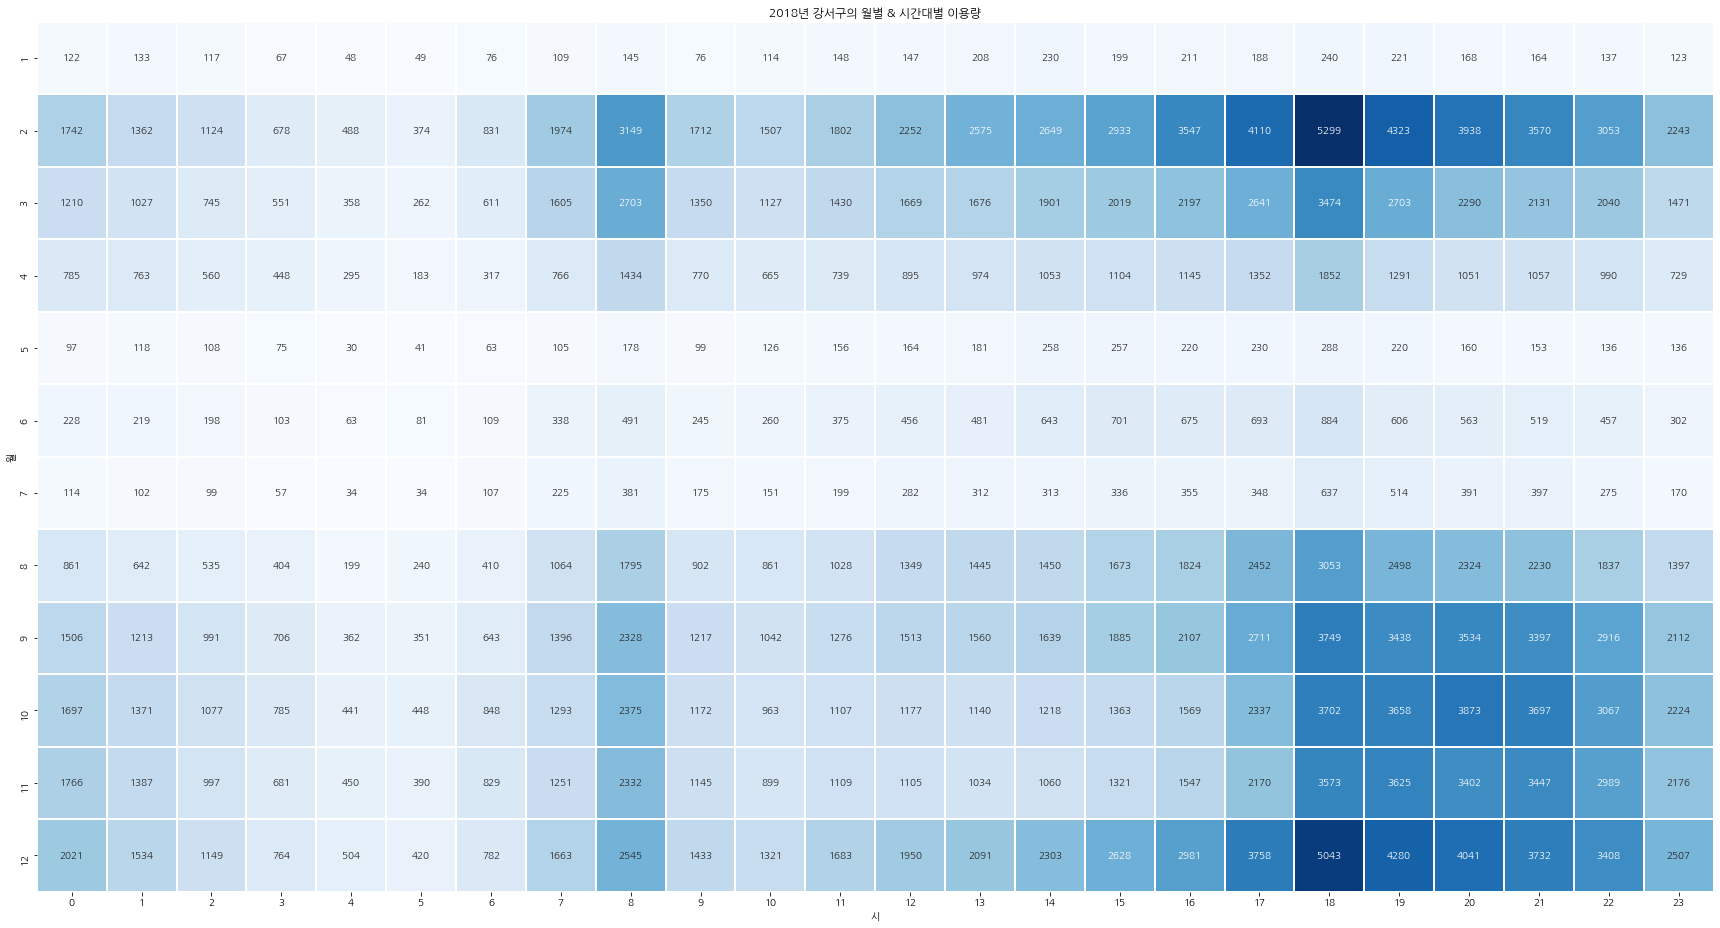

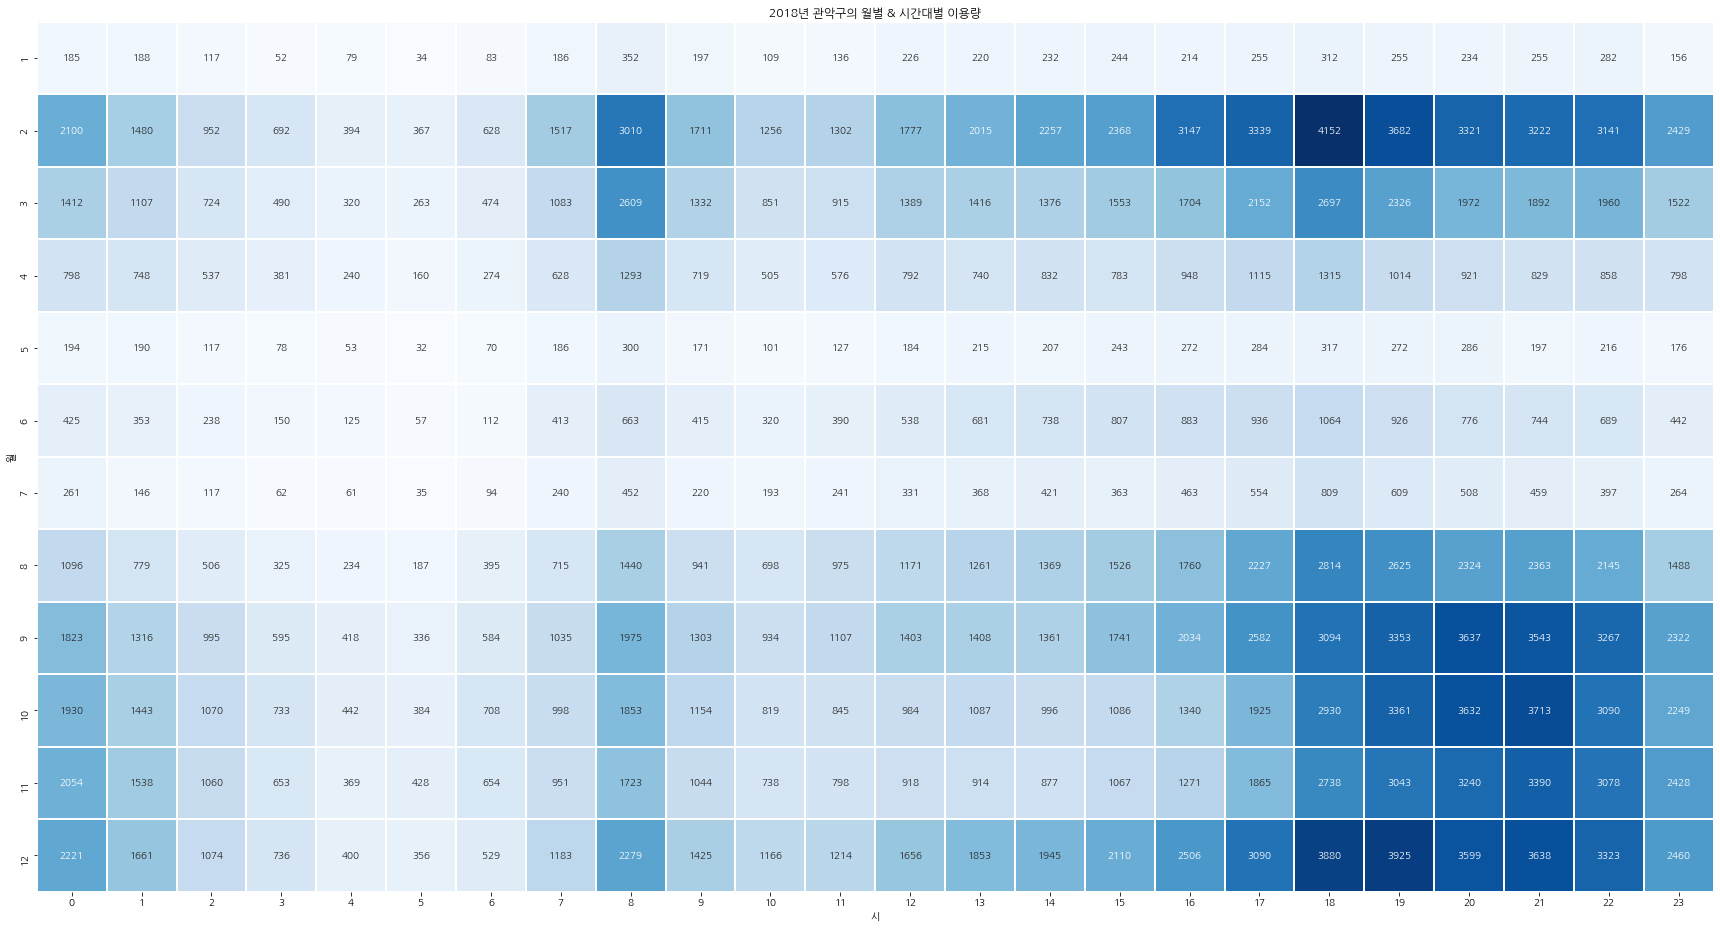

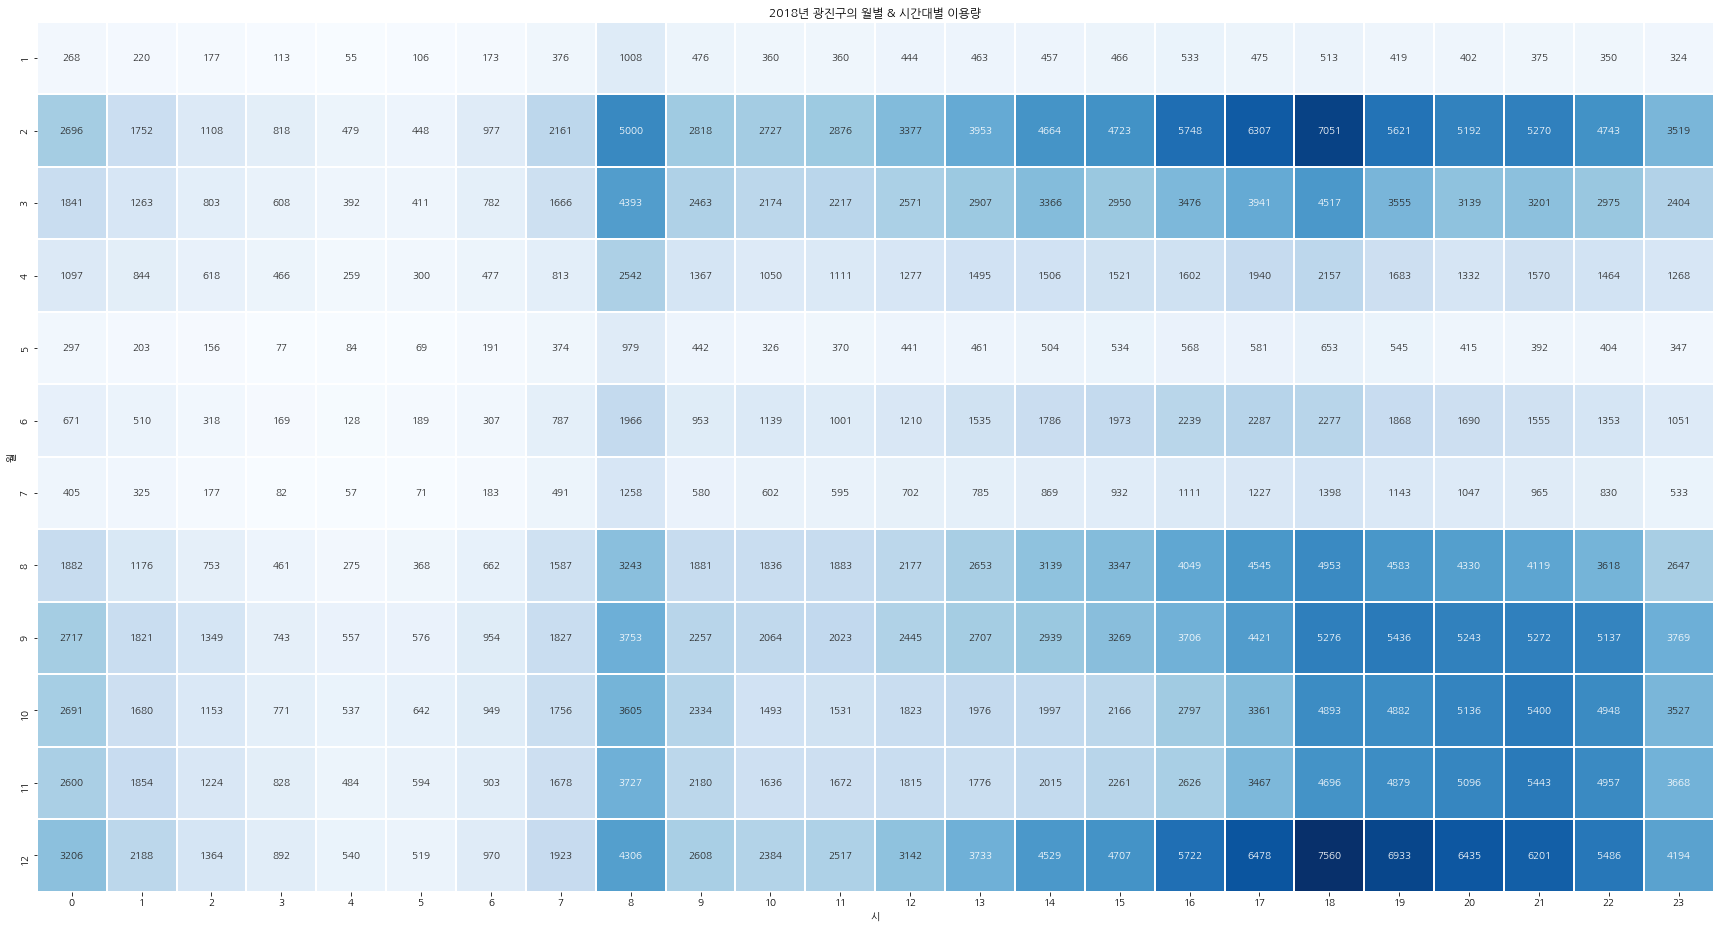

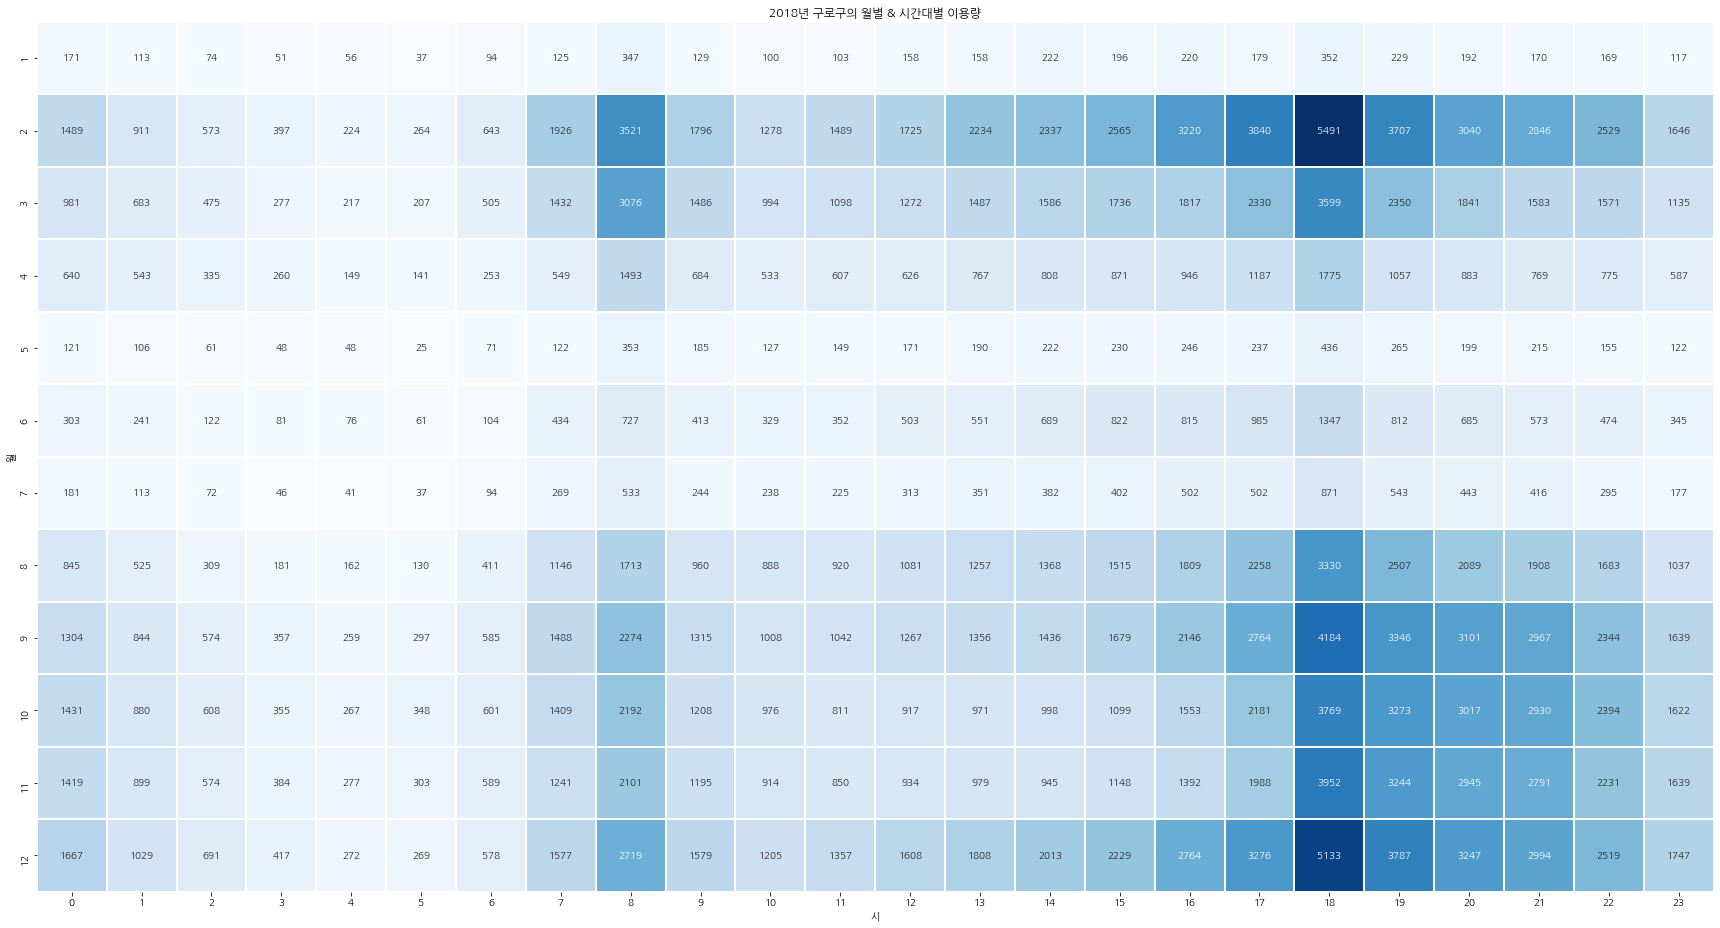

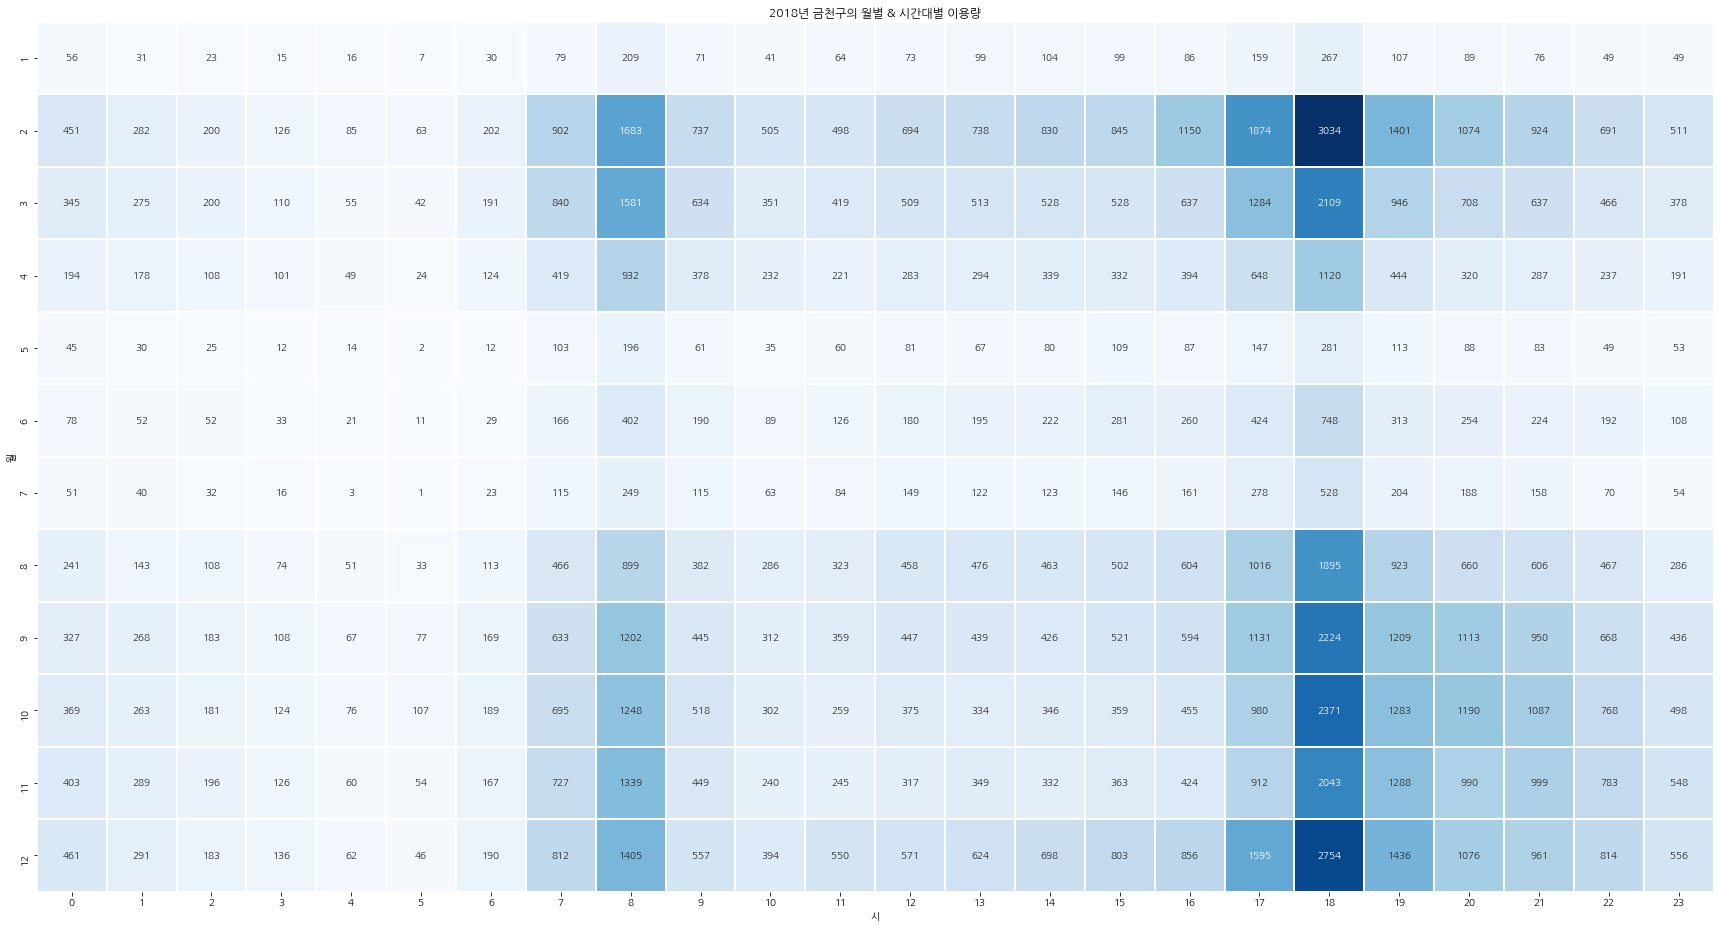

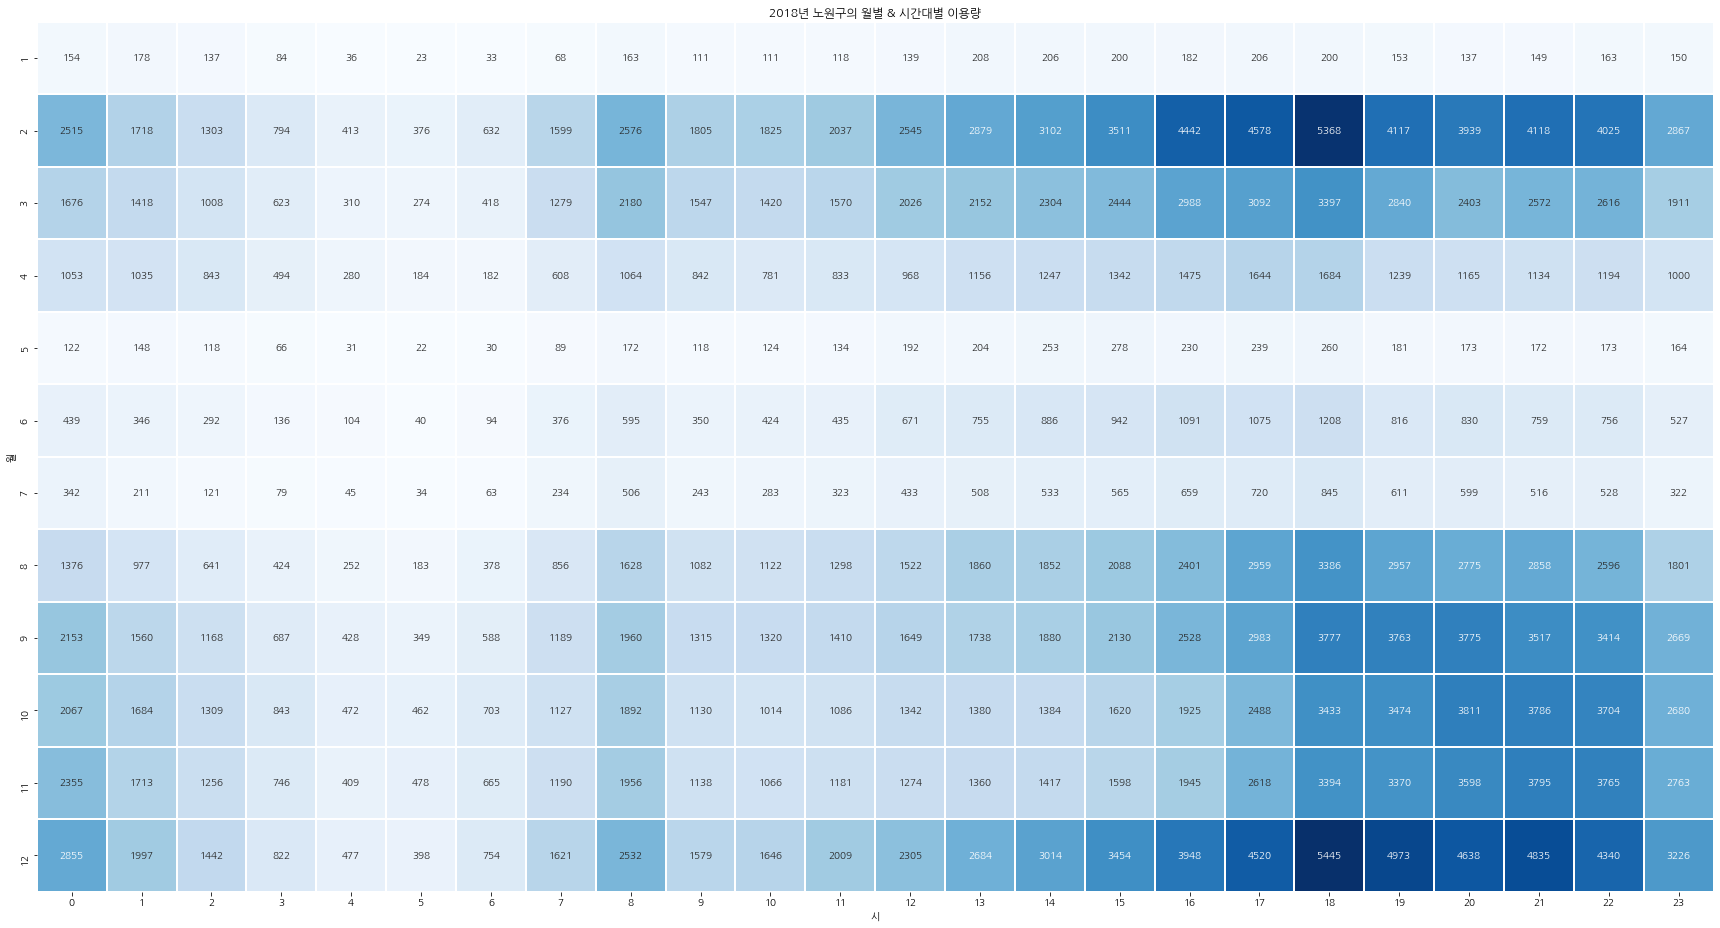

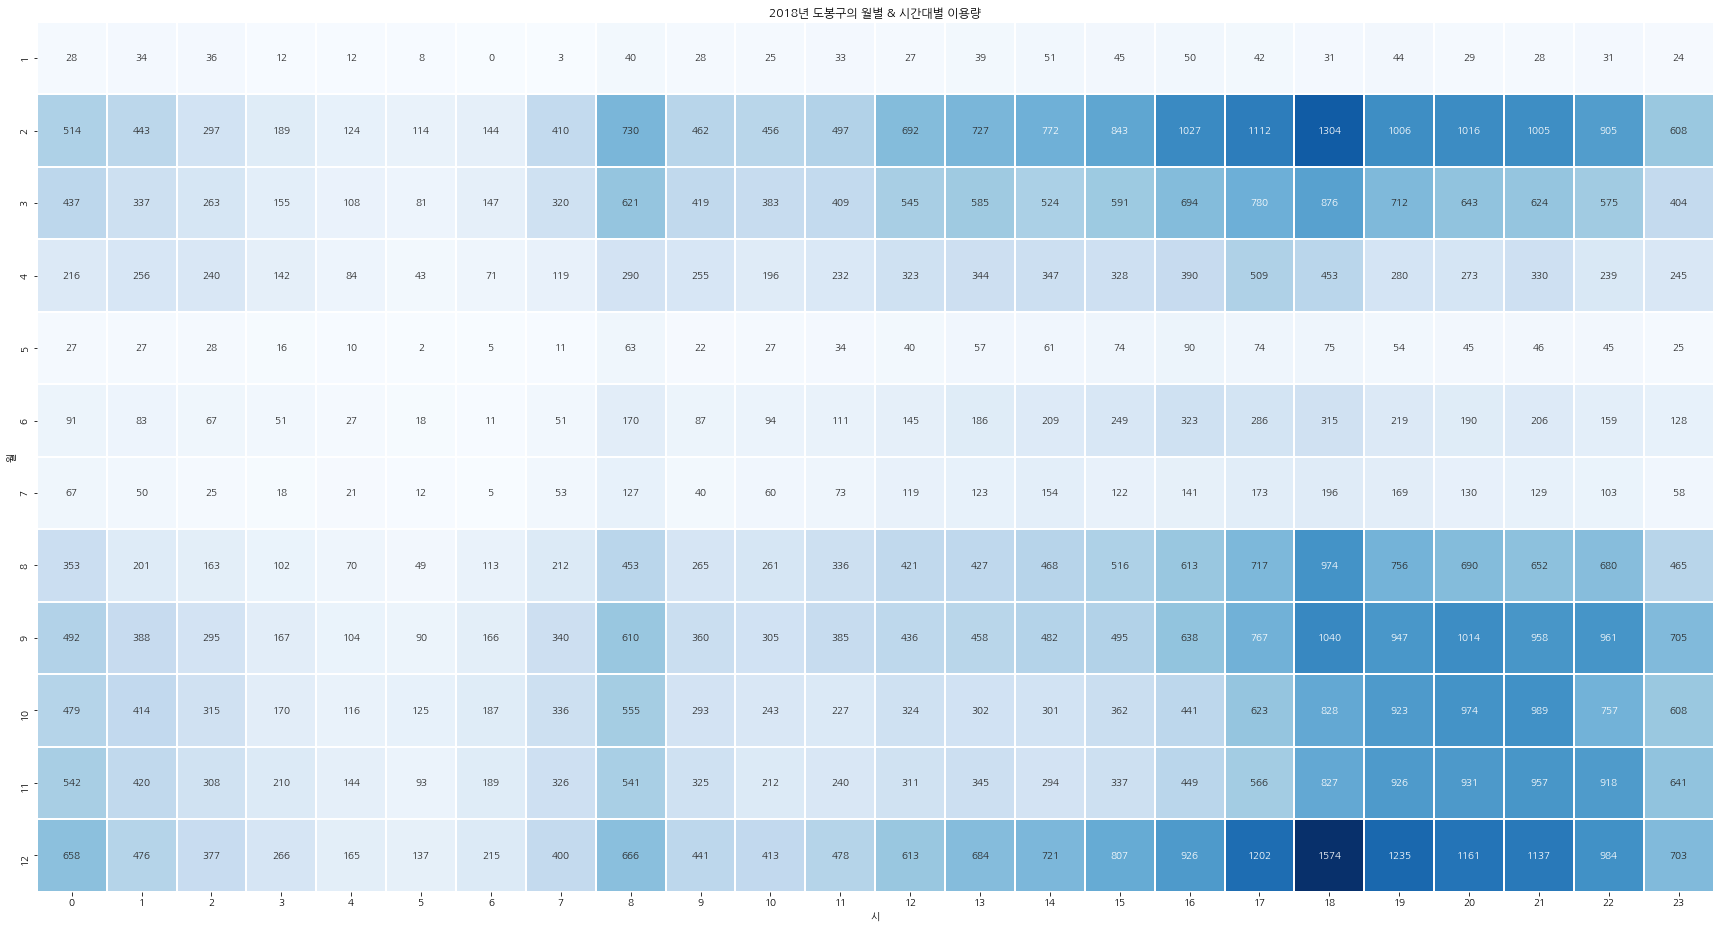

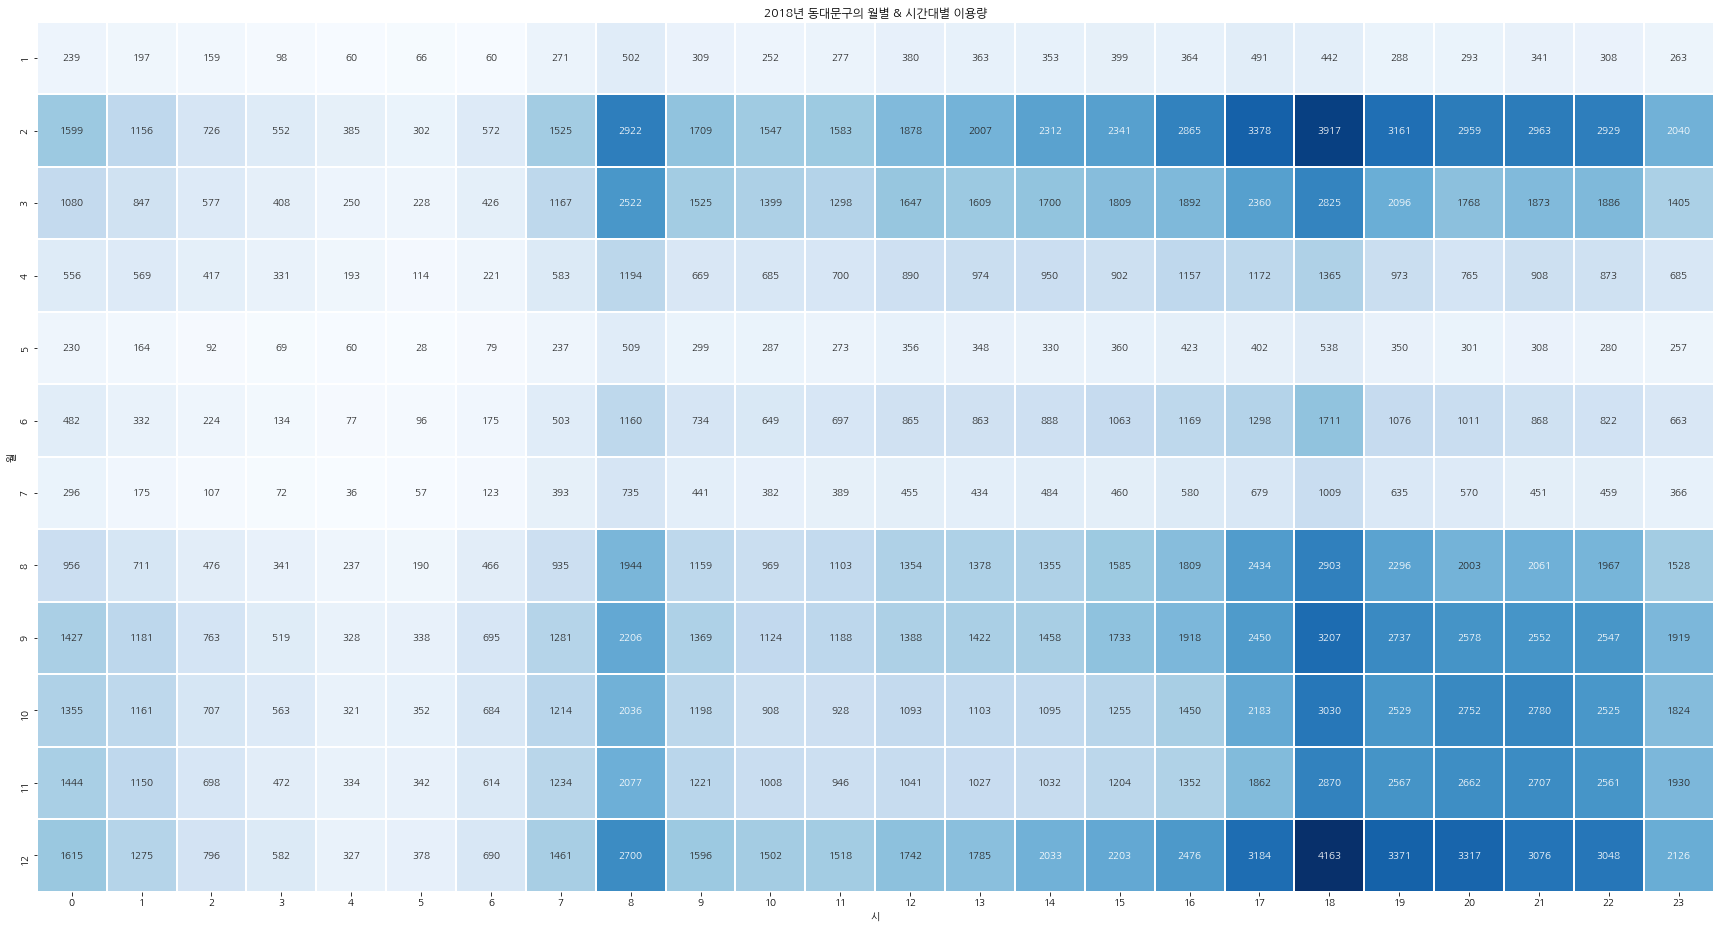

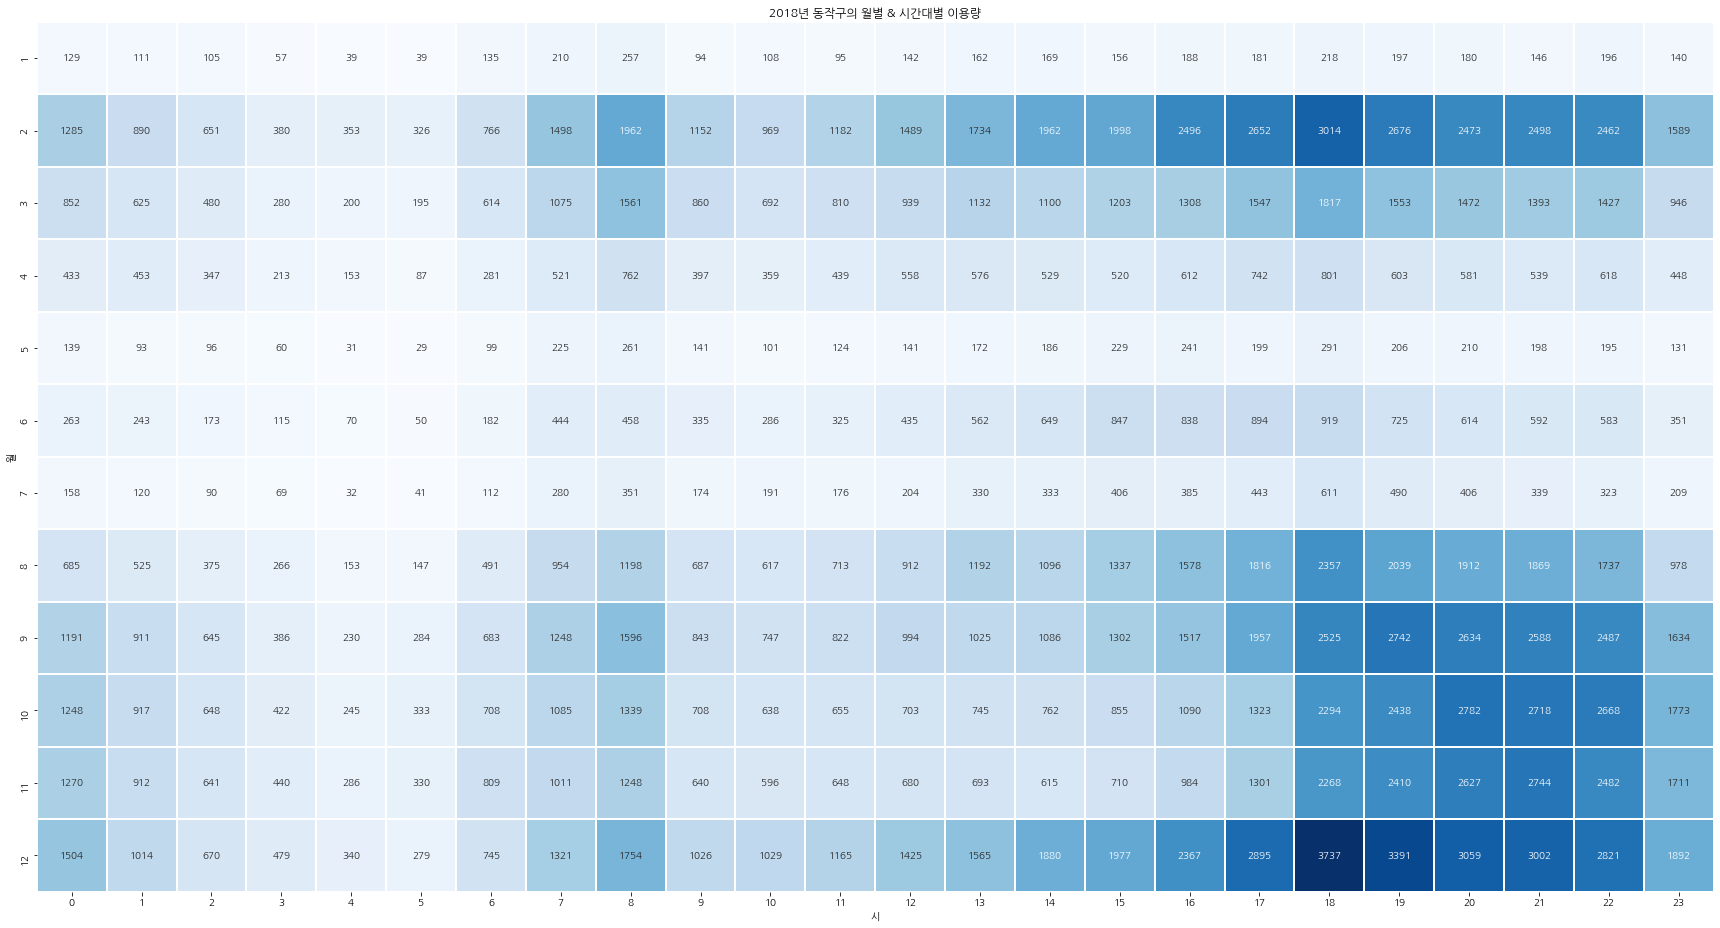

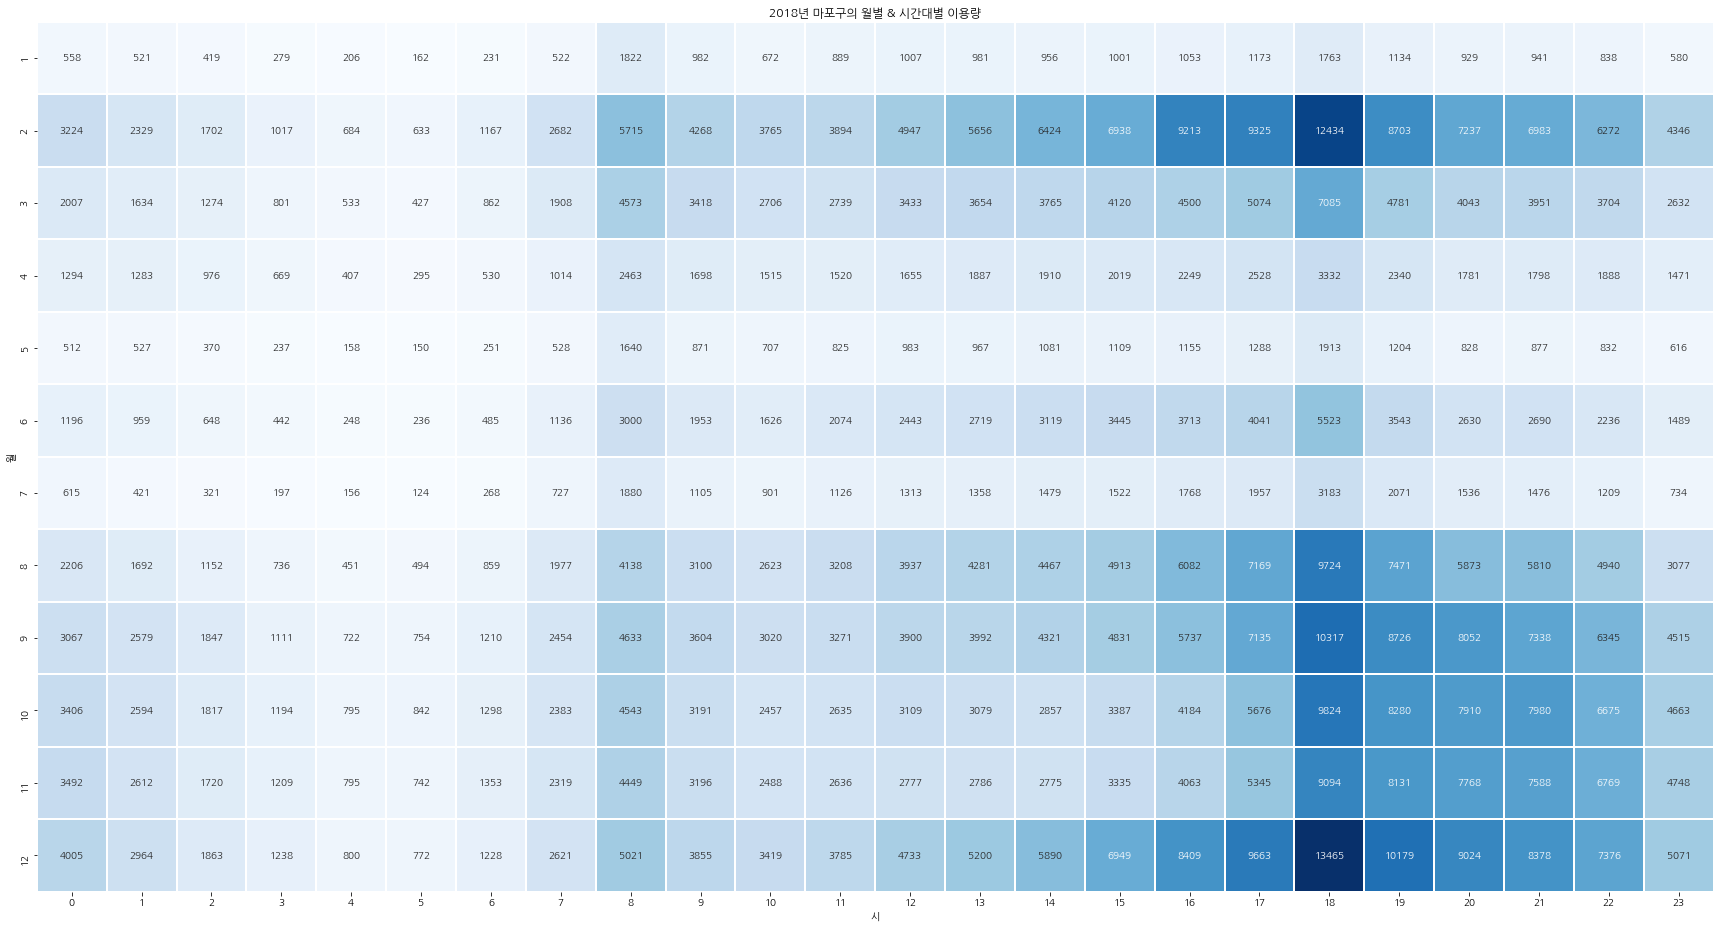

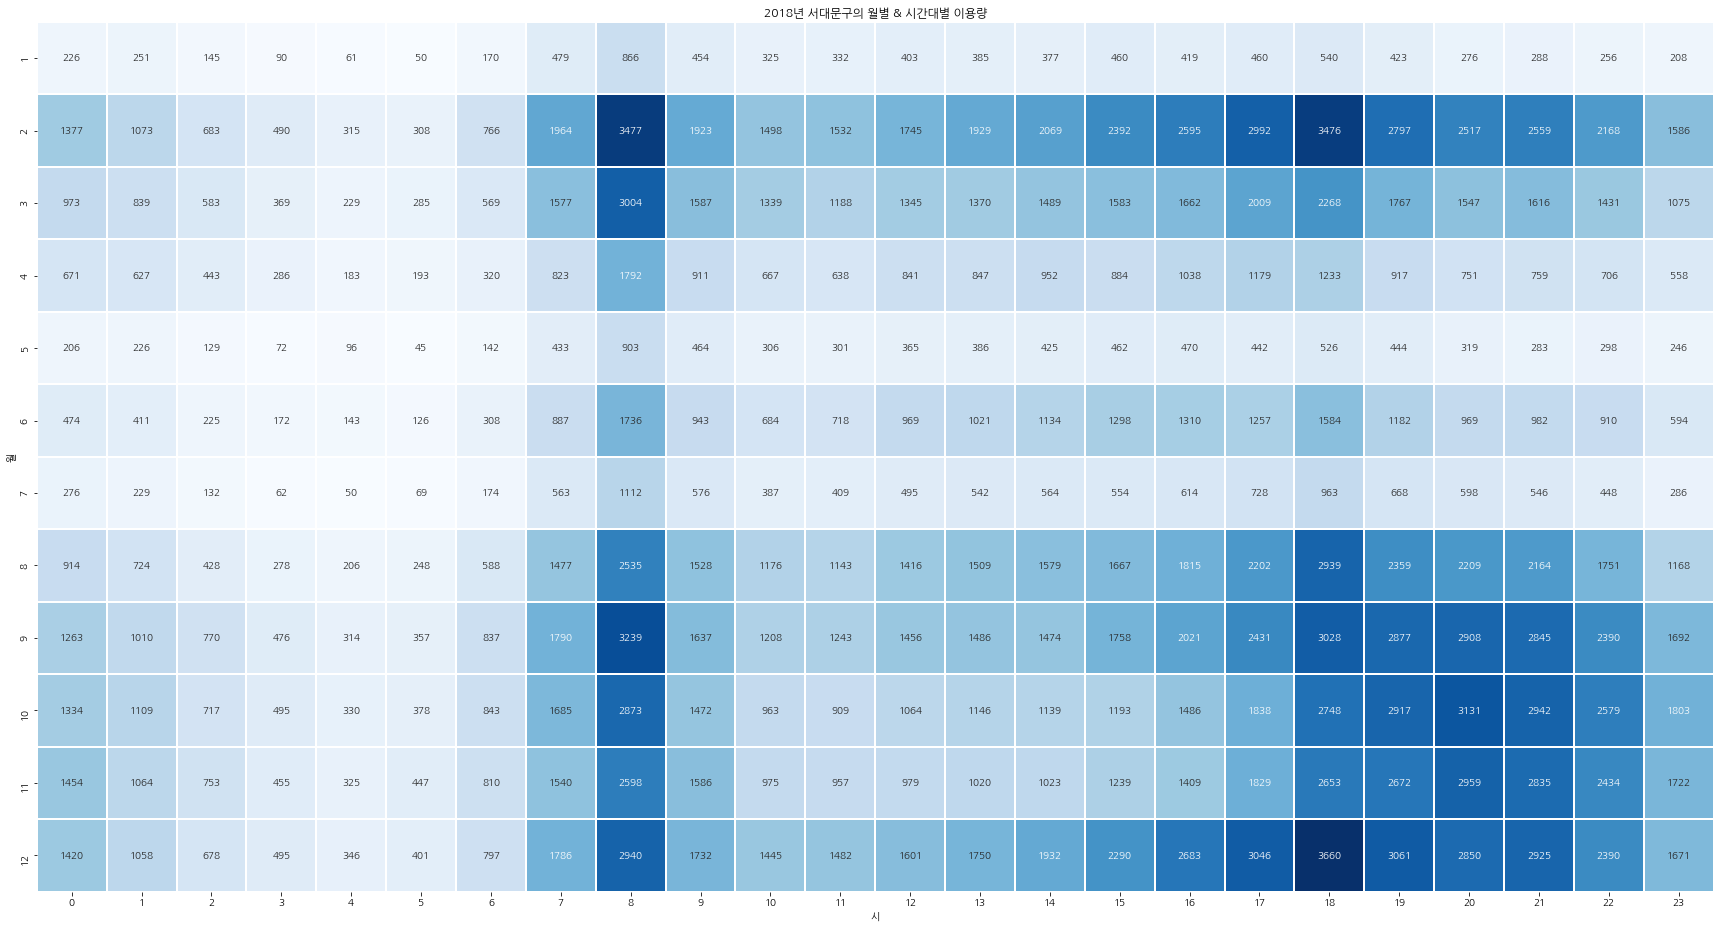

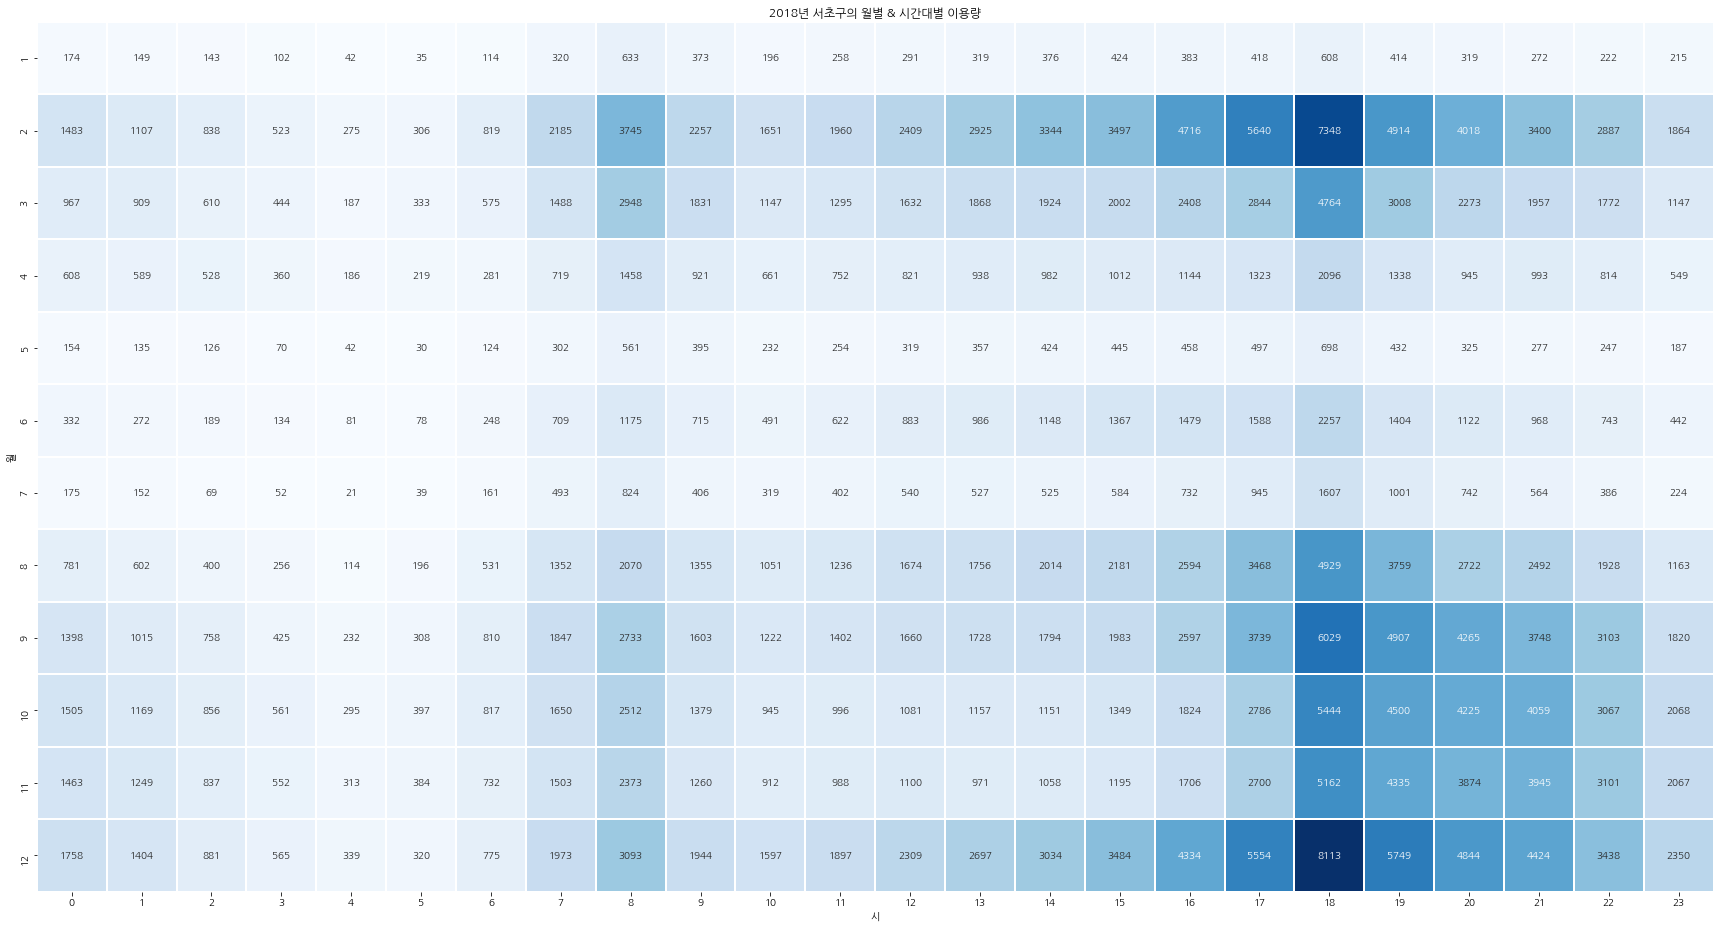

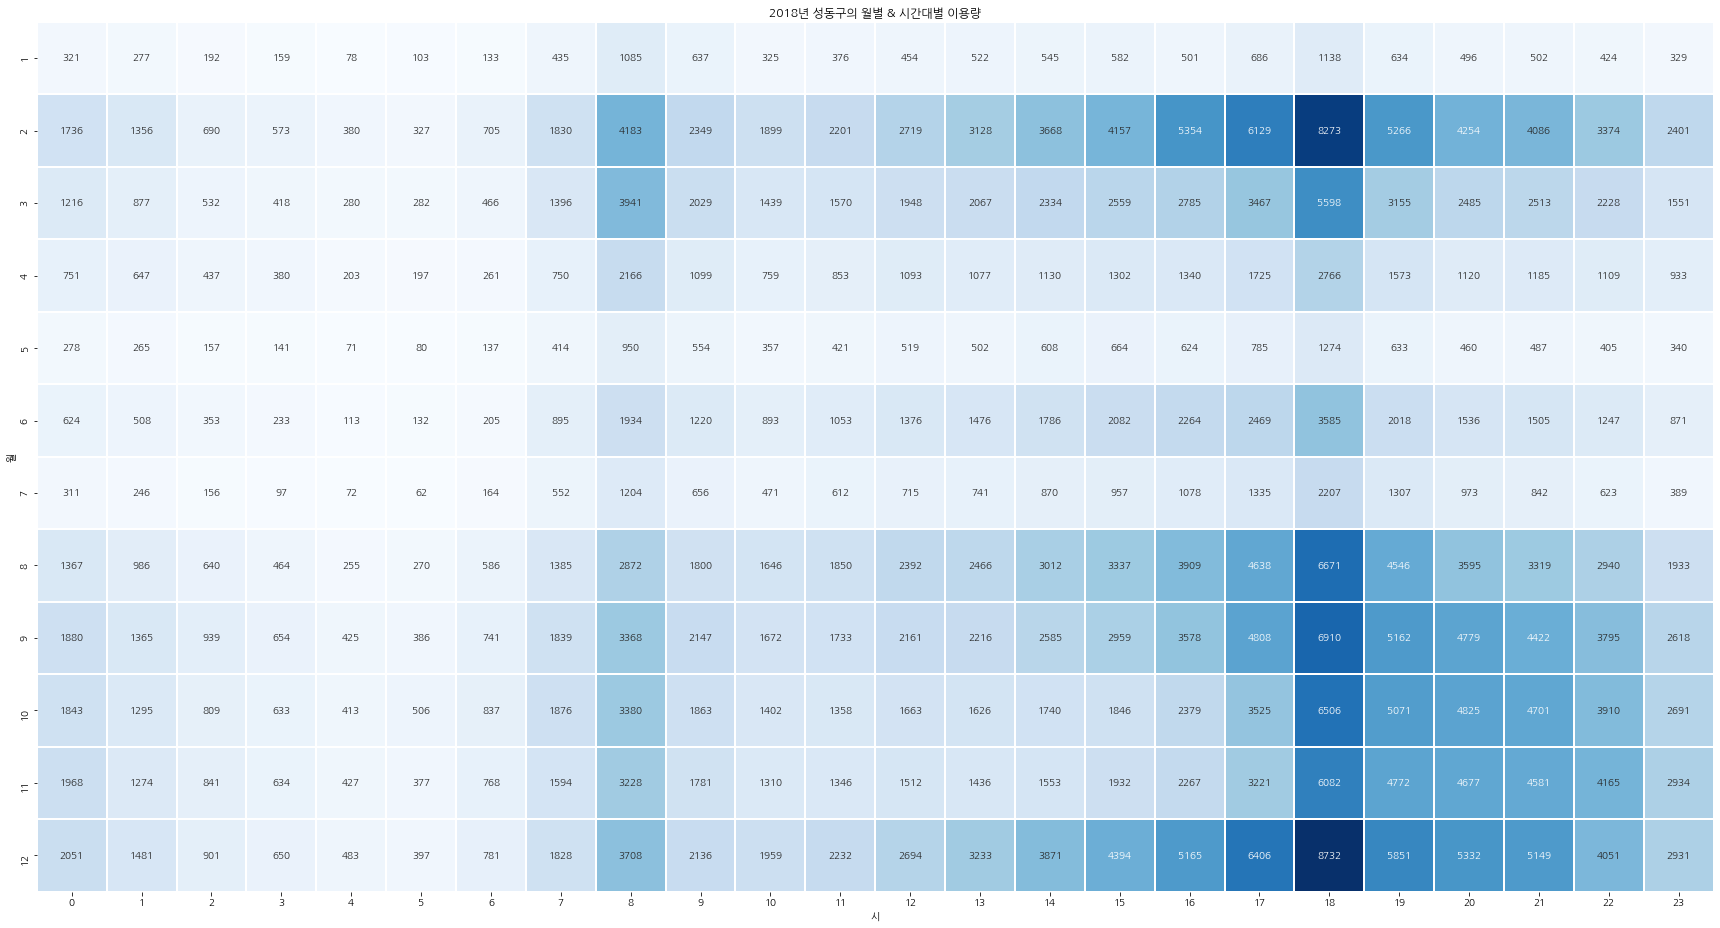

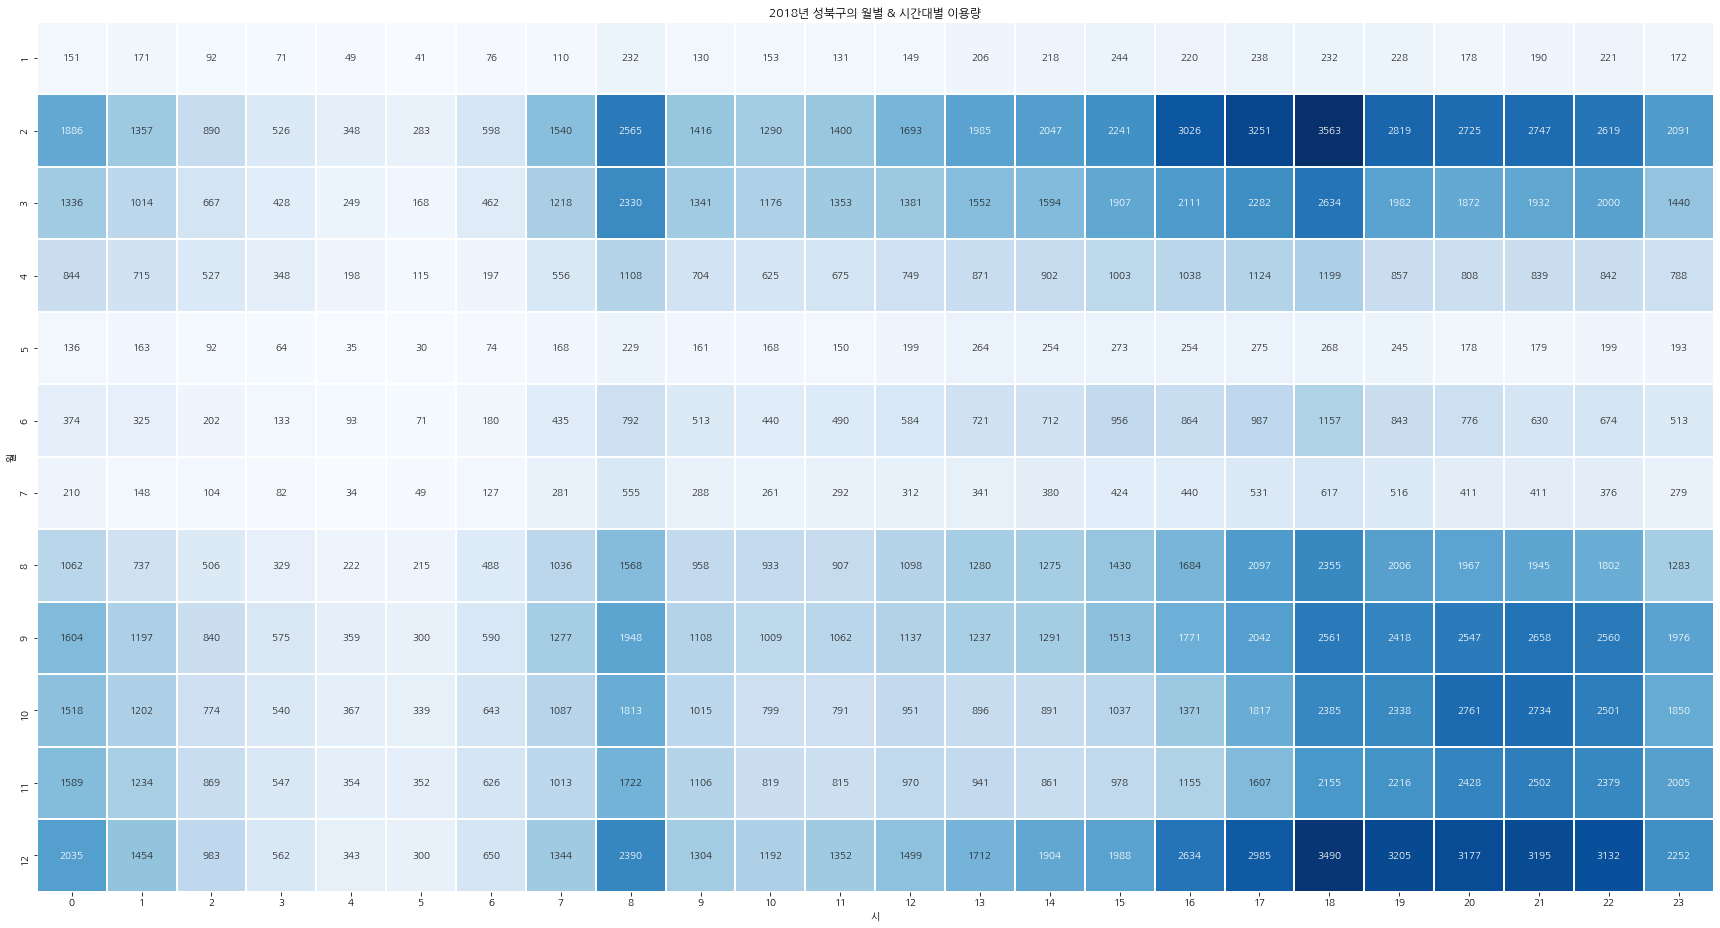

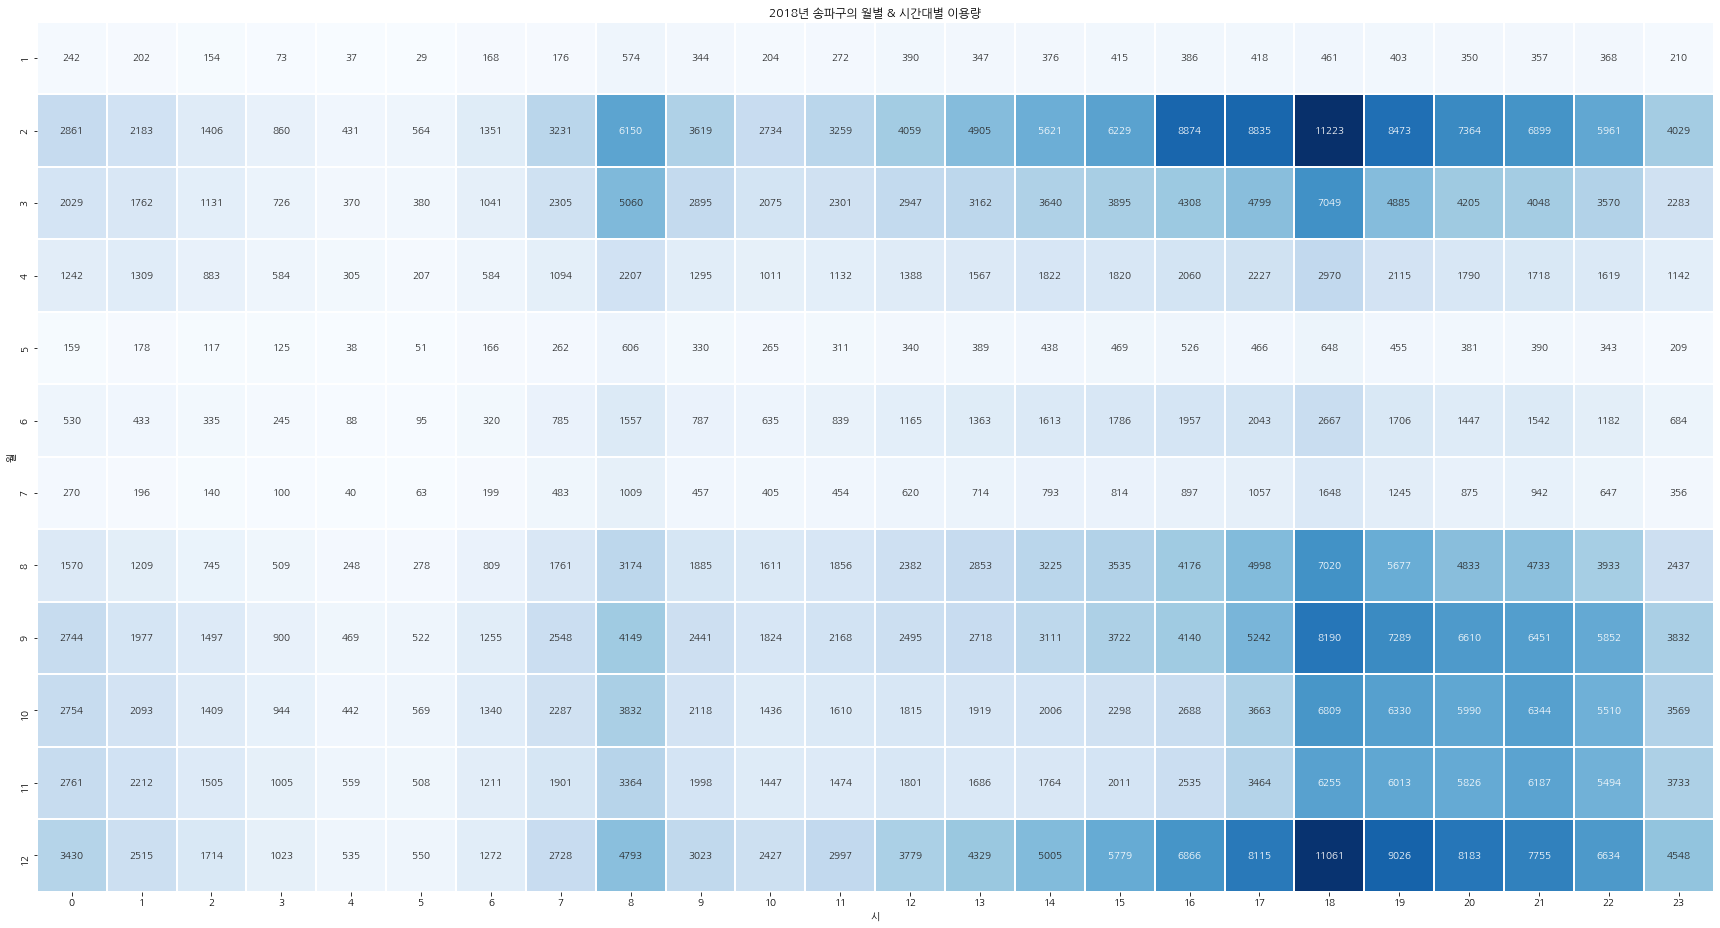

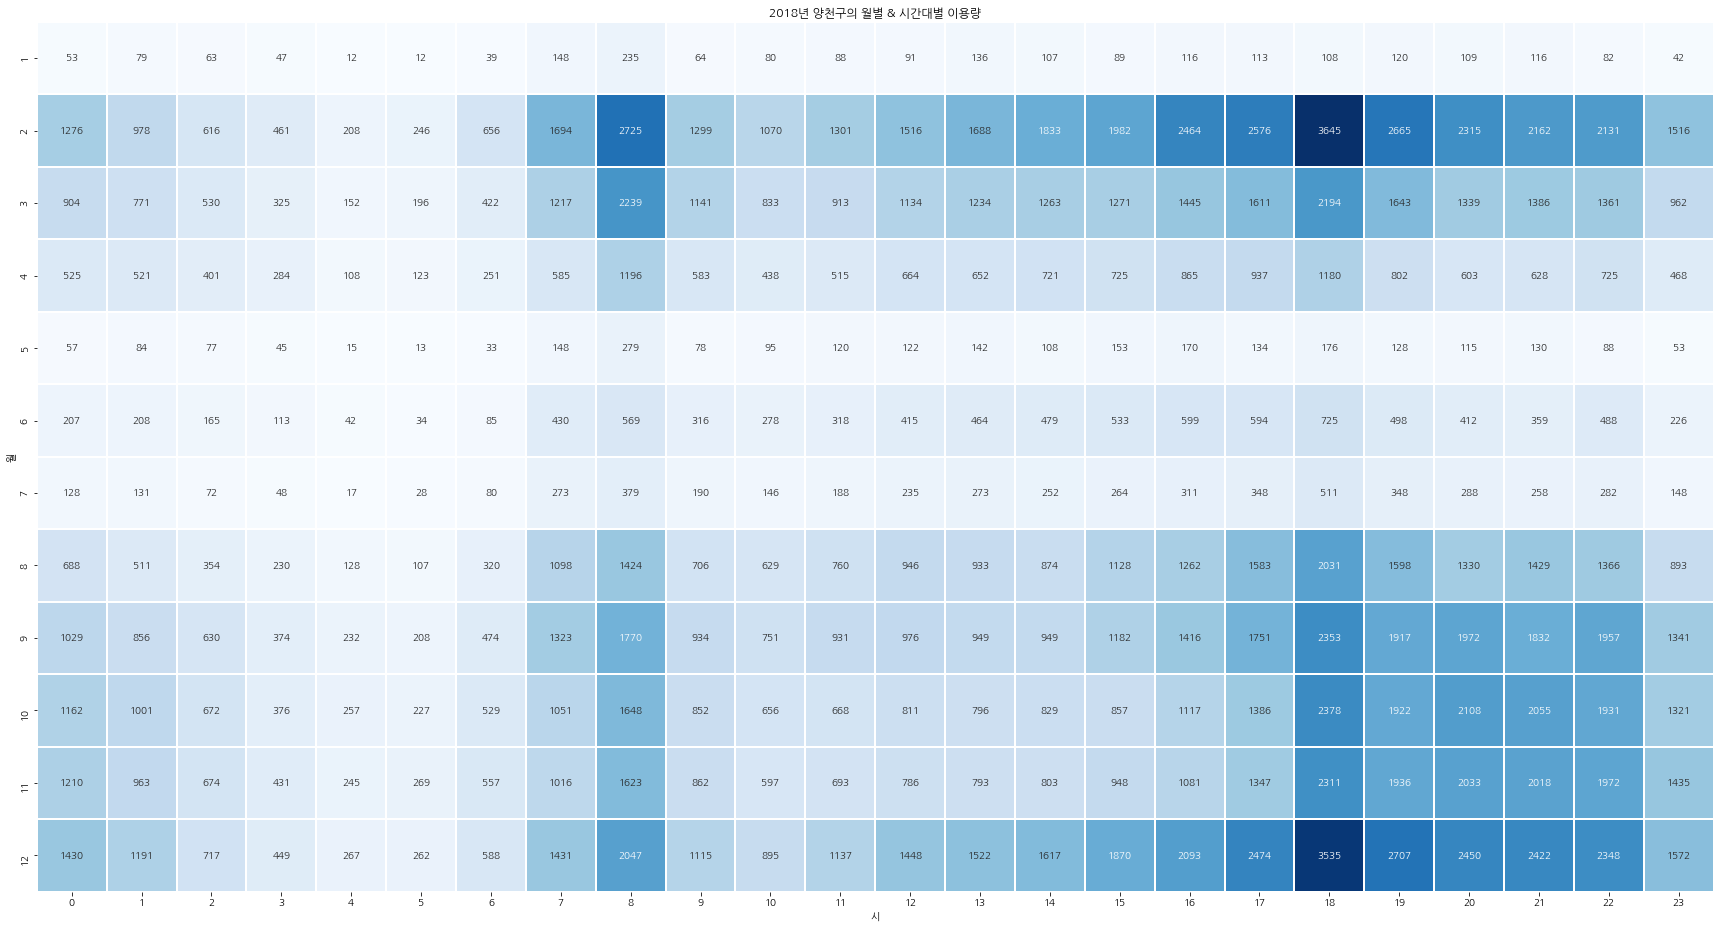

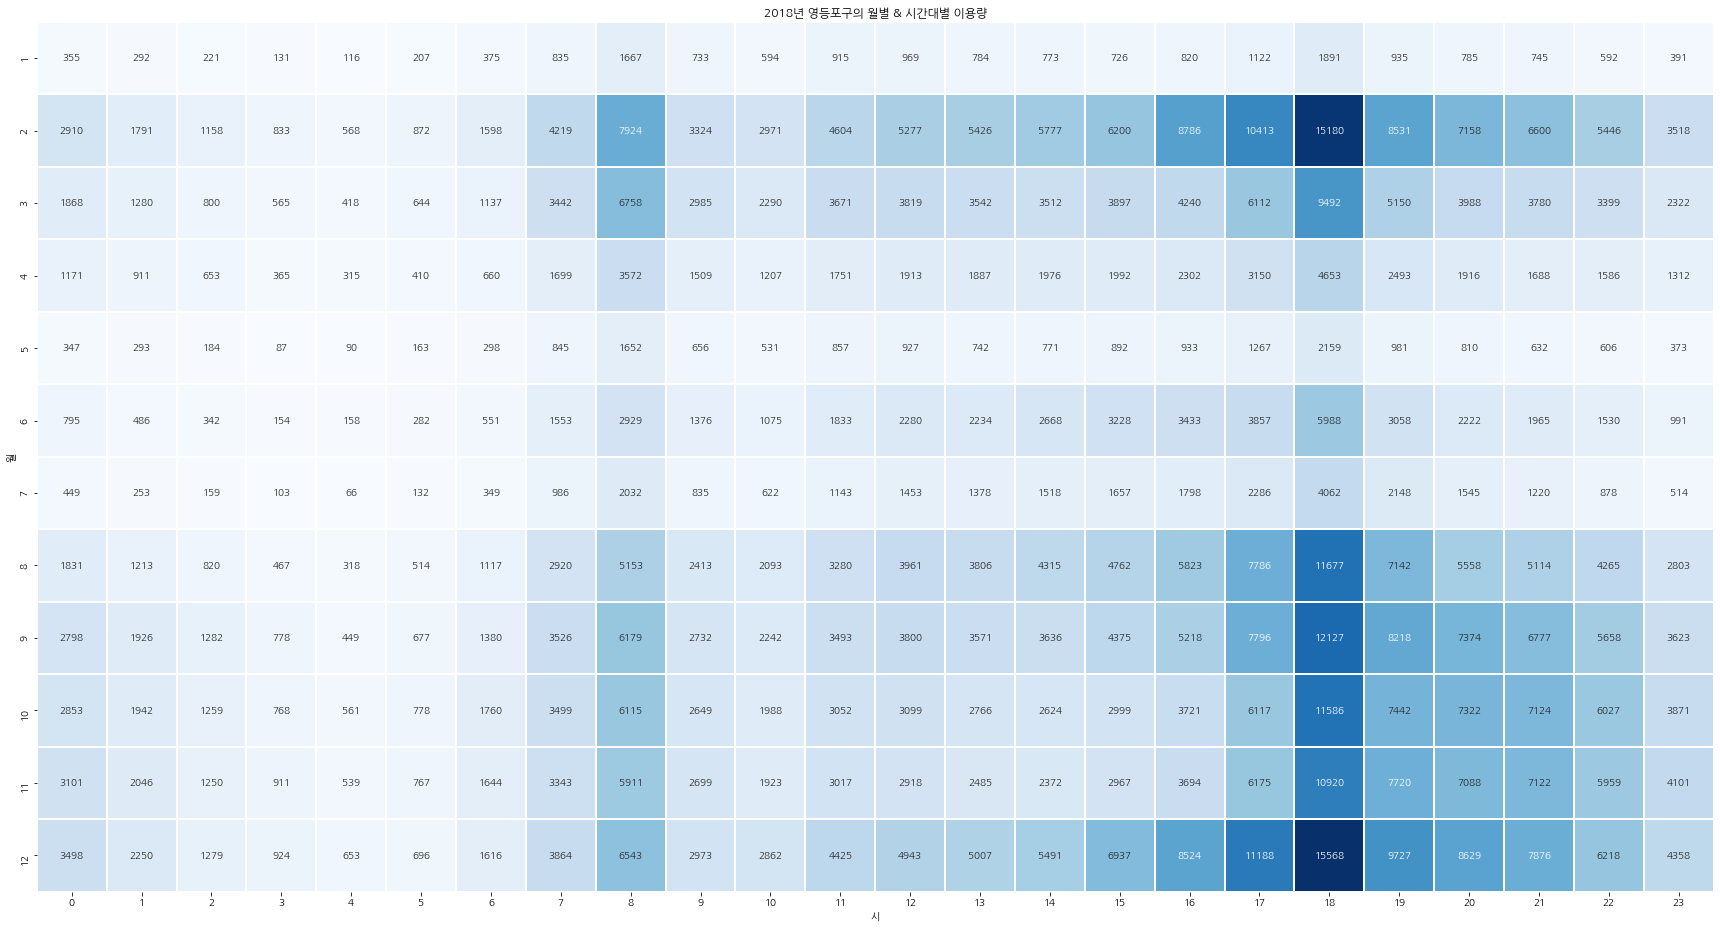

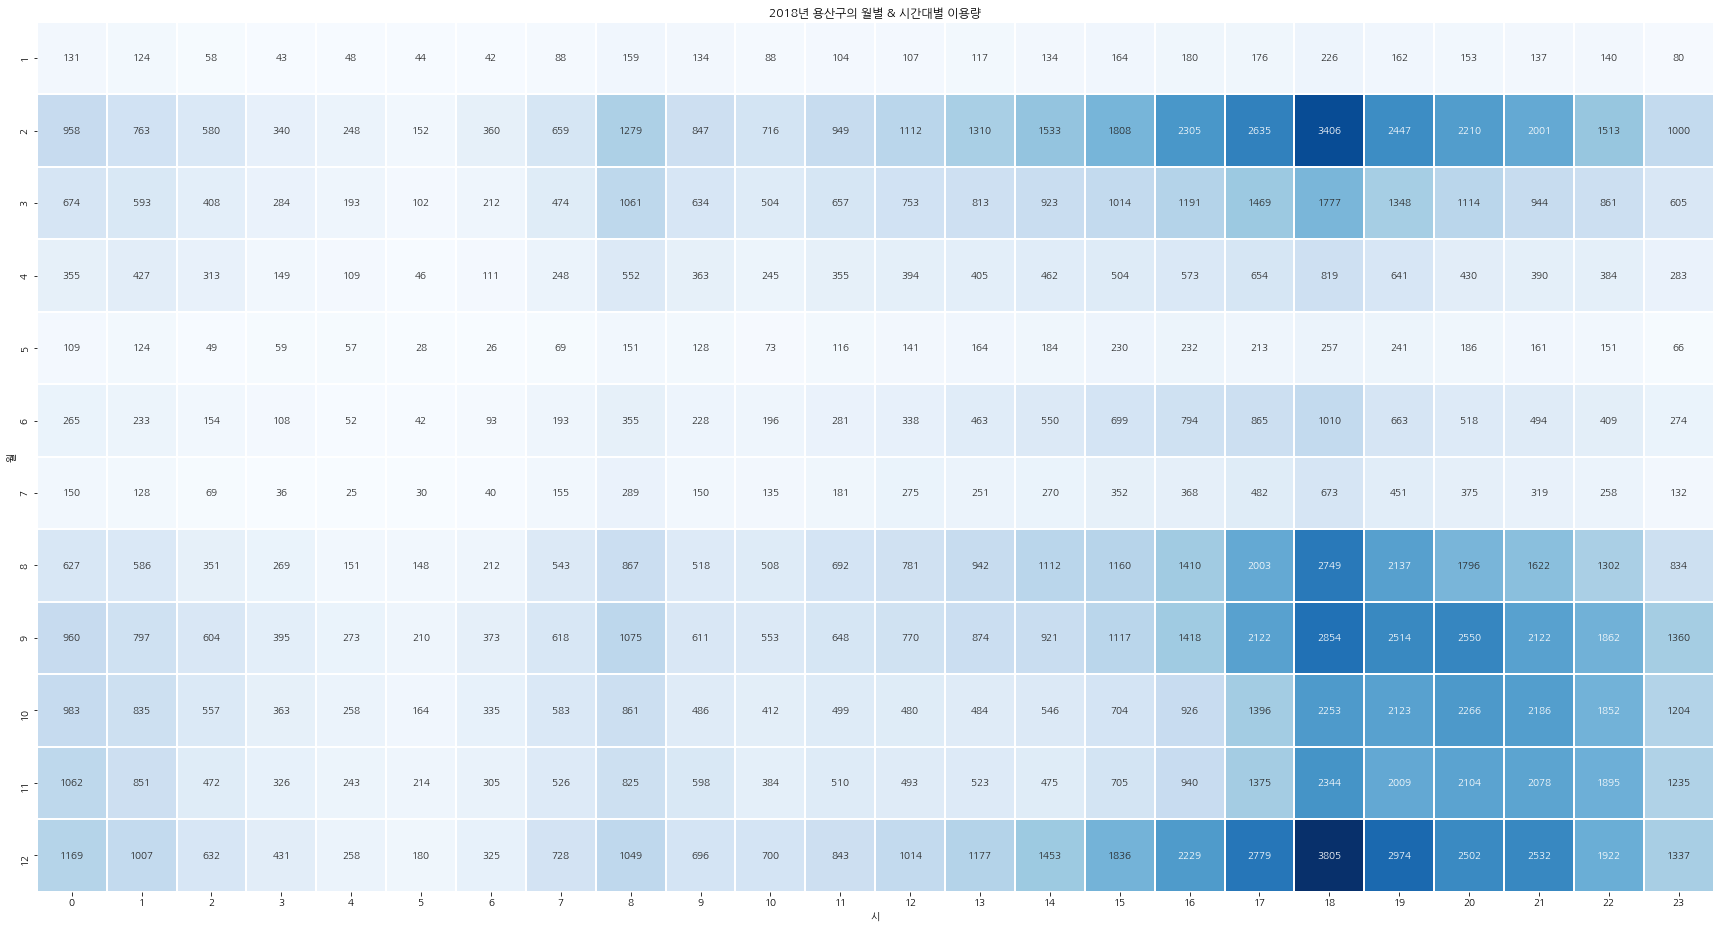

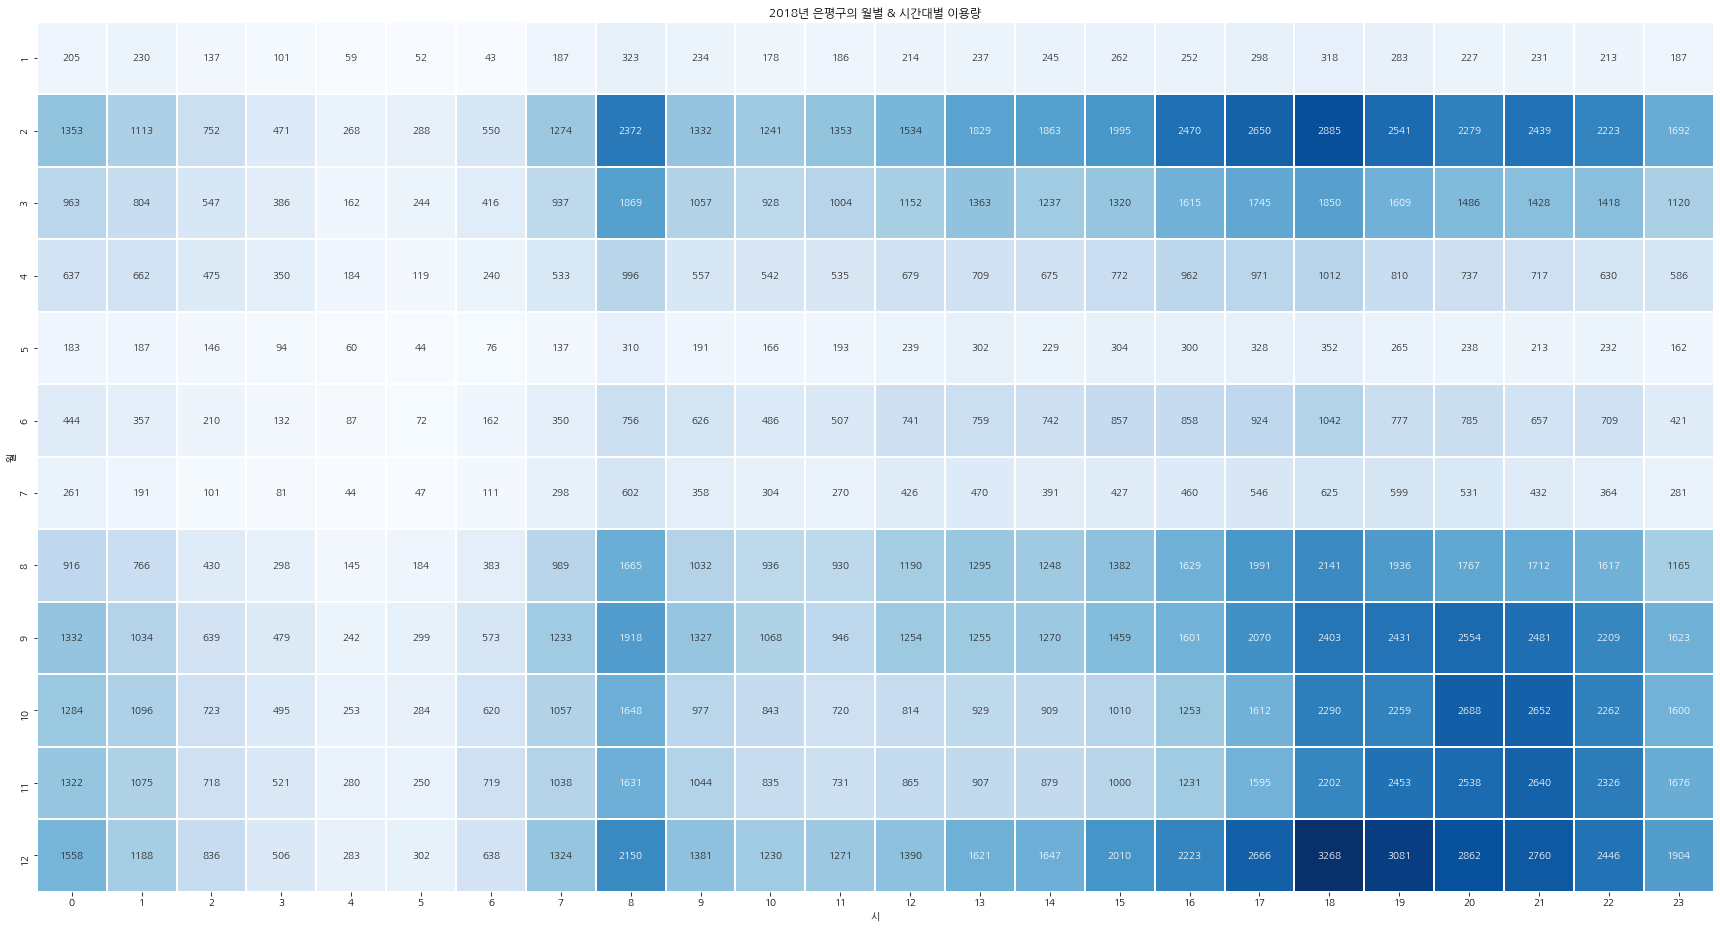

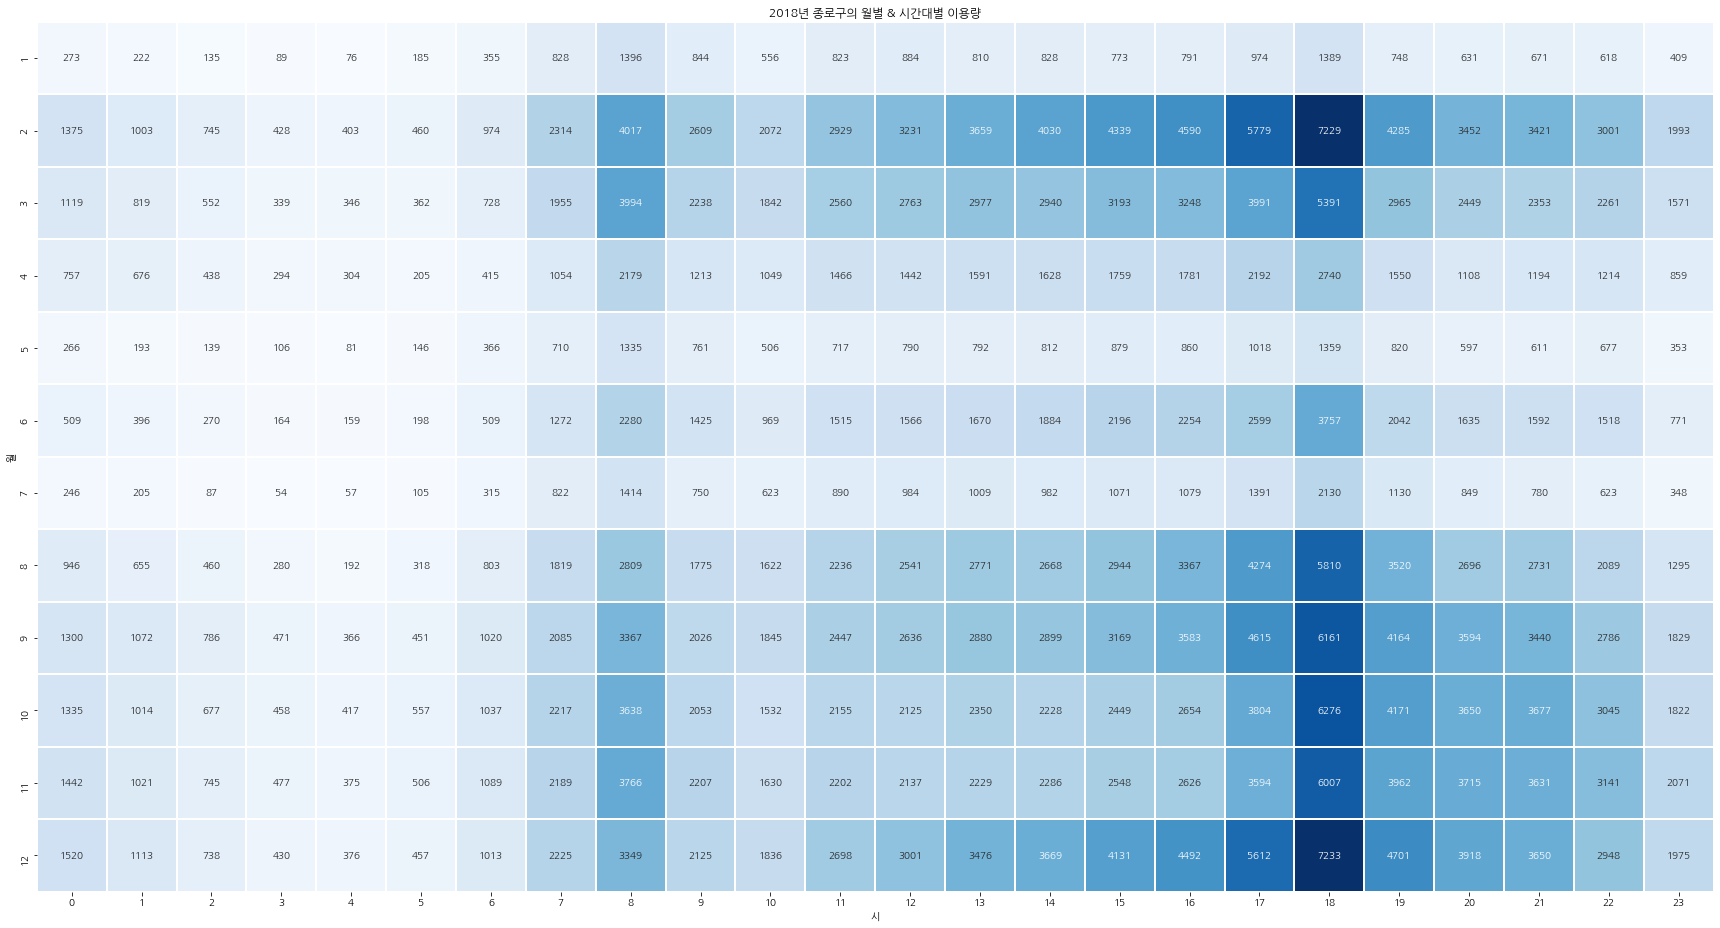

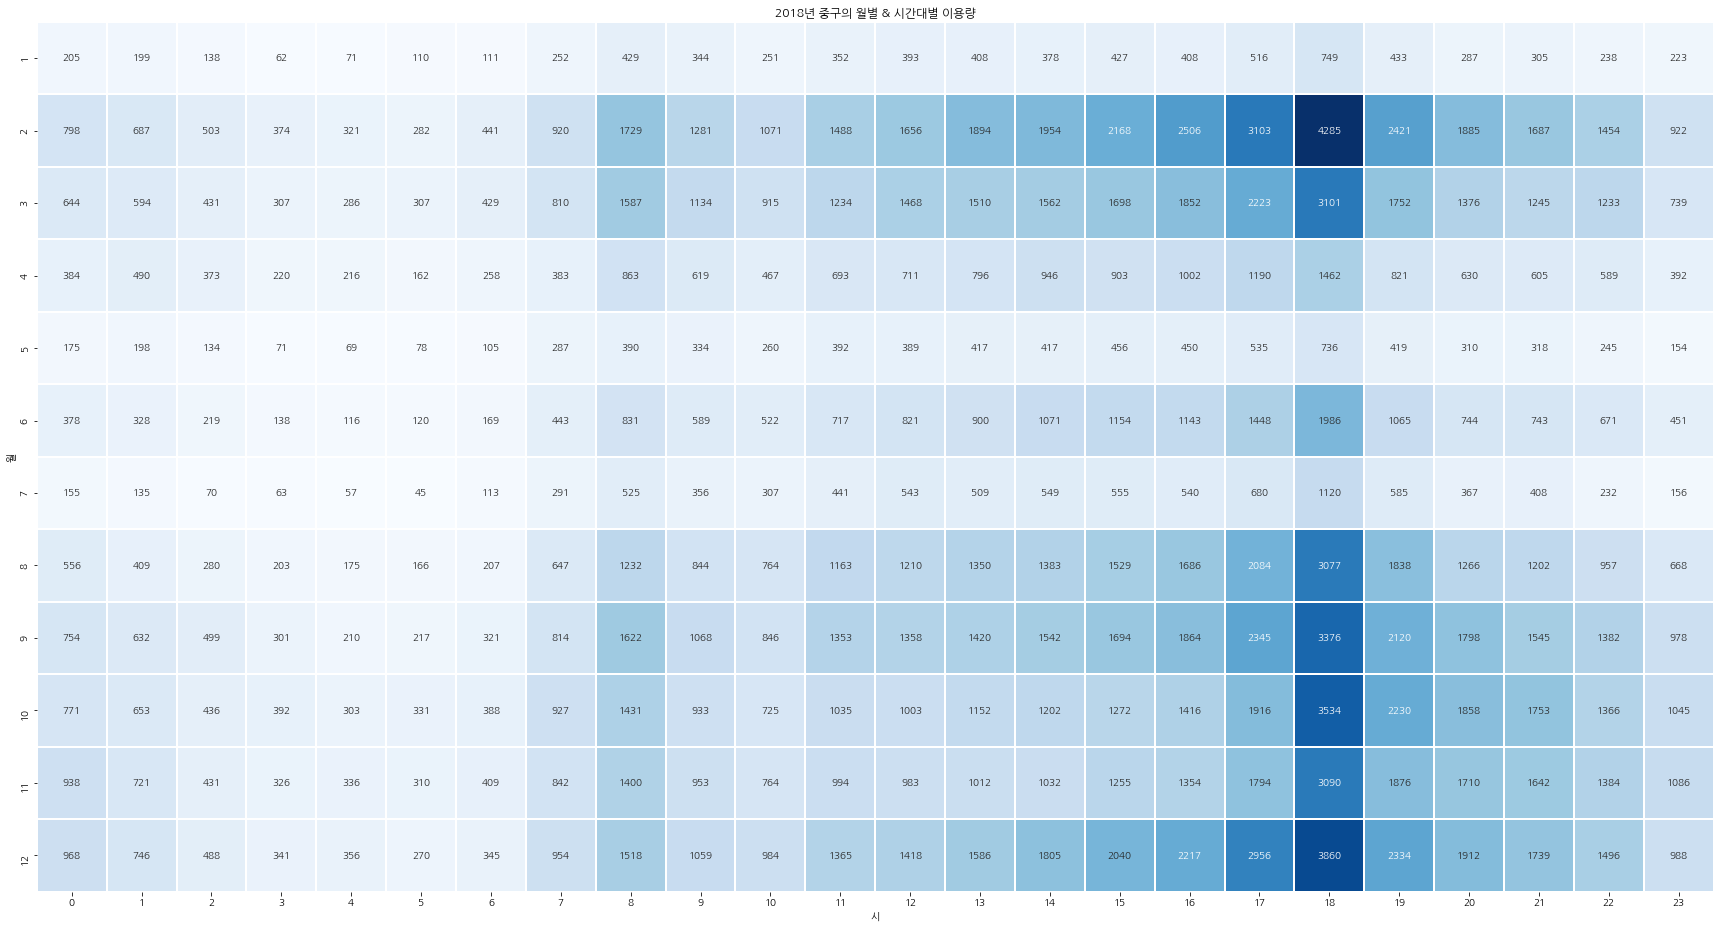

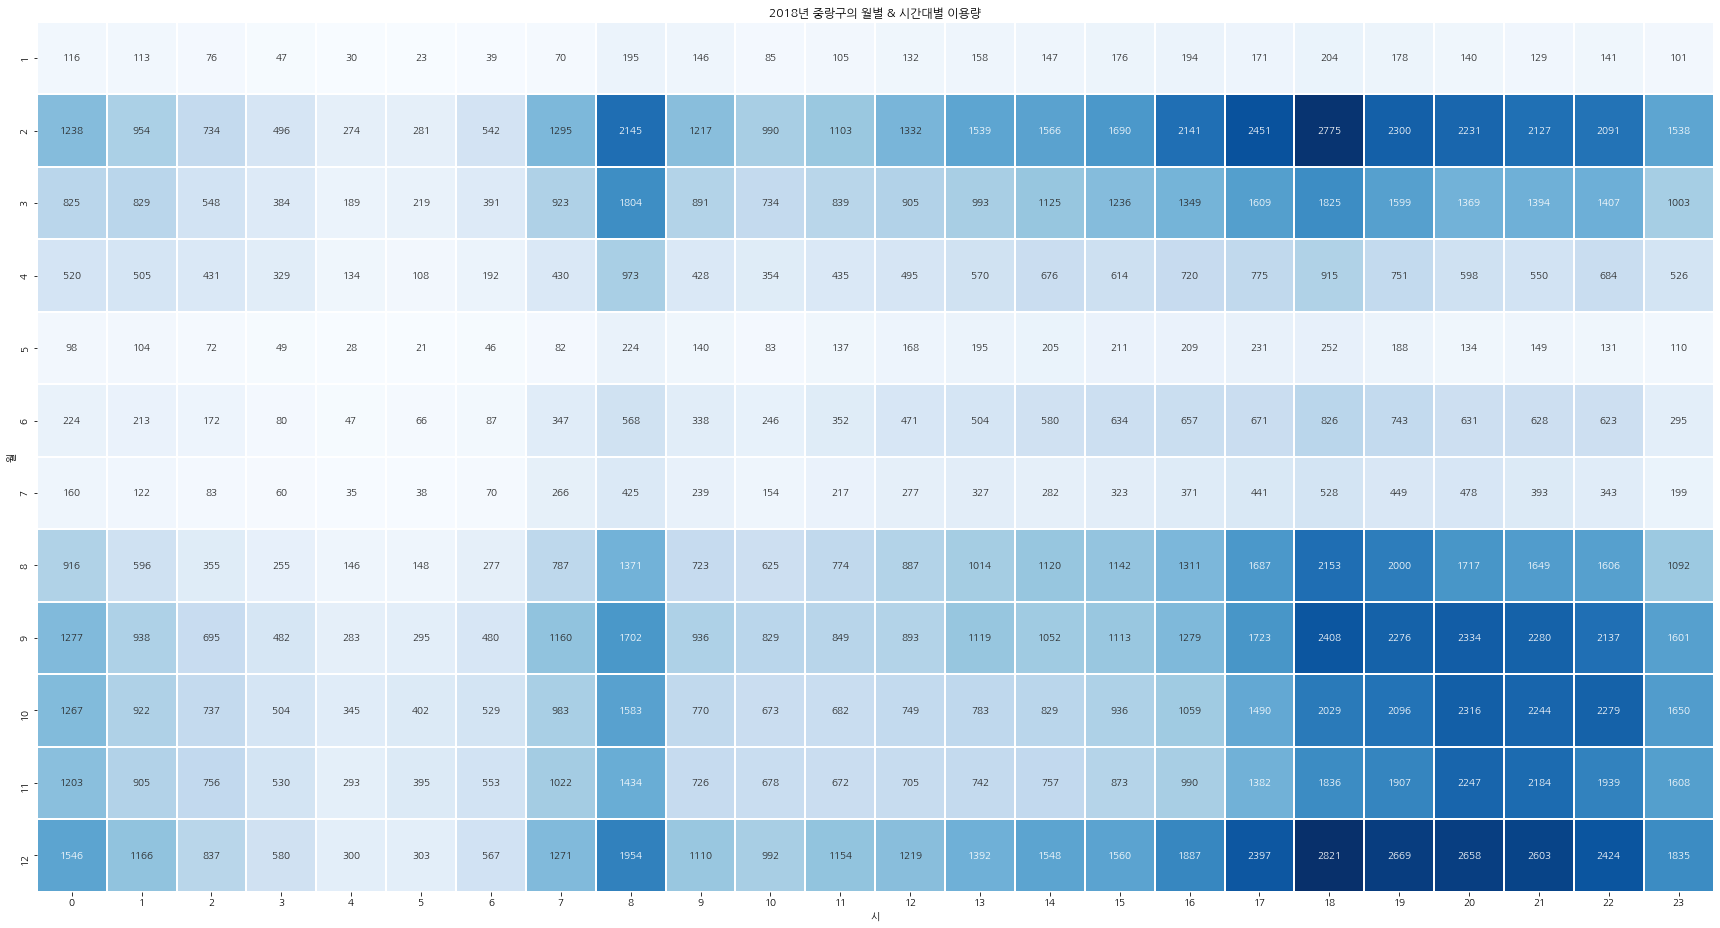

In [56]:
gu_ko=['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', 
       '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', 
       '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', 
       '은평구', '종로구', '중구', '중랑구']
def GU(gu):
    result=pd.DataFrame(columns=['대여월','대여시','이용량'])
    for i in range(1,month_ea+1):
        is_gu=globals()['month_{}'.format(i)]['대여 지역'] == gu
        for j in range(0,24):
            is_hour=globals()['month_{}'.format(i)]['대여시']==j
            amount=len(globals()['month_{}'.format(i)][is_gu&is_hour])
            result=result.append({'대여월':i,'대여시':j,'이용량':amount}, ignore_index=True)
    result['이용량']=result['이용량'].astype('int')
    return result
for i in range(0,len(gu_ko)):
    Pivot=GU(gu_ko[i]).pivot('대여월','대여시','이용량')
    plt.figure(figsize = (24, 13))
    sns.heatmap(Pivot, annot=True, fmt='d', cmap="Blues", cbar=False, linewidth=1)
    plt.title("{}년 {}의 월별 & 시간대별 이용량".format(year,gu_ko[i]))
    plt.xlabel("시")
    plt.ylabel("월")
    plt.tight_layout()
    plt.show()